In [627]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings 
filterwarnings("ignore")

In [628]:
df=pd.read_csv("austo_automobile.csv")
df.head(2)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV


# 1.a)

In [629]:
df.shape

(1581, 14)

In [630]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


## Ans: The data consists of 1,581 rows and 14 columns. The data has 1 ‘float64’, 5 ‘int64’ and 8 ‘object’ datatypes. 

## 1.b)

In [631]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1475.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19573.149277,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38300.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


In [632]:
df.describe(include='object')

,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
count,1528,1581,1581,1581,1581,1581,1581,1581
unique,4,2,2,2,2,2,2,3
top,Male,Salaried,Married,Post Graduate,Yes,No,Yes,Sedan
freq,1199,896,1443,985,792,1054,868,702


In [633]:
df.isnull().sum()[df.isnull().sum()>0]

Gender             53
Partner_salary    106
dtype: int64

In [634]:
df.Gender.unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [635]:
df.Gender.value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [636]:
df['Gender'].replace(['Femle'], 'Female', inplace=True)

In [637]:
df['Gender'].replace(['Femal'], 'Female', inplace=True)

In [638]:
df.Gender.value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

In [639]:
mode1=df['Gender'].mode().values[0]
df['Gender']=df['Gender'].replace(np.nan, mode1)

## Ans: Fixing the spelling errors and replacing the nan values with Mode.

In [640]:
df.Gender.value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

In [641]:
df.isnull().sum()[df.isnull().sum()>0]

Partner_salary    106
dtype: int64

In [642]:
df['Partner_salary']= df['Total_salary'] - df['Salary']
df.head(2)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300,165800,61000,SUV


In [643]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

## Ans: After applying the formula for Partner_salary column, there are no more null values in the given set. 

In [644]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,19233.776091,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19670.391171,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25100.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38100.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


In [645]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   Gender            1581 non-null   object
 2   Profession        1581 non-null   object
 3   Marital_status    1581 non-null   object
 4   Education         1581 non-null   object
 5   No_of_Dependents  1581 non-null   int64 
 6   Personal_loan     1581 non-null   object
 7   House_loan        1581 non-null   object
 8   Partner_working   1581 non-null   object
 9   Salary            1581 non-null   int64 
 10  Partner_salary    1581 non-null   int64 
 11  Total_salary      1581 non-null   int64 
 12  Price             1581 non-null   int64 
 13  Make              1581 non-null   object
dtypes: int64(6), object(8)
memory usage: 173.0+ KB


In [646]:
df.Make.unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

In [647]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,19233.776091,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19670.391171,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25100.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38100.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


In [648]:
df.describe(include='object')

,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
count,1581,1581,1581,1581,1581,1581,1581,1581
unique,2,2,2,2,2,2,2,3
top,Male,Salaried,Married,Post Graduate,Yes,No,Yes,Sedan
freq,1252,896,1443,985,792,1054,868,702


## 1.b) Ans:
## i)	The Age group of customers ranges from 22 years to 54 years, and the mean age is 31.92 i.e., 32 years.
## ii)	Mean salary of this group is 60392.22 and the Median salary is 59500. Here, mean is greater than the median, so the distribution of data is slightly skewed to the right.
## iii)	Mean of Total salary is 79625.99 and the Median salary is 78000. 
## iv)	Price range of the cars is from 18000 to 70000.
## v)	Of 1581 customers, 1252 of them are Male.
## vi)	About 1054 car buyers do not have House loan.
## vii)	702 of 1581 car buyers prefer Sedan over Hatchback and SUVs.
## viii)	1443 of the customers are Married.


In [649]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


## 1.c) Ans:

In [650]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

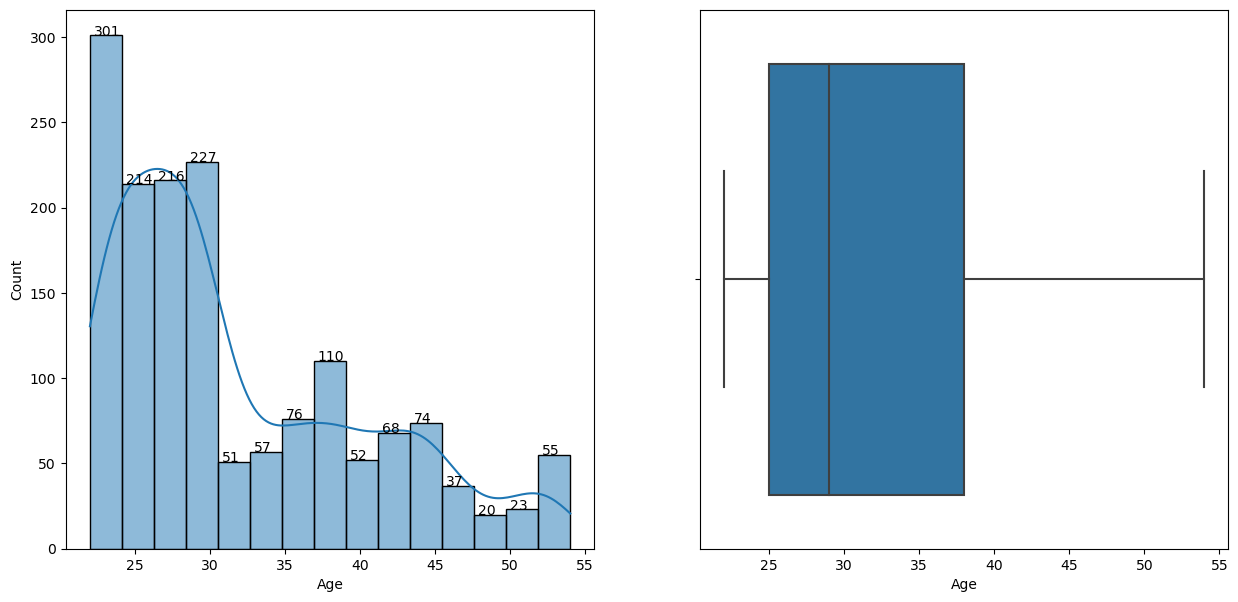

In [651]:
# i) Age:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(15,7))
ax=sns.histplot(df.Age, kde=True, ax=axs[0])
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
sns.boxplot(x='Age',data=df, ax=axs[1])
plt.show()  

## Insights:
- The Age group of the customers ranges from 22 years to 54 years. Positively skewed distribution, as the distribution of data is skewed to the right.
- There are no outliers in the Age column of the given data set.
- Maximum number of new car buyers are 22 -30 years of age. And then there is a sudden drop from age 31 onwards. 
- We observe that, people of 46-54 years of age are the less car buyers when compared with the other age group.

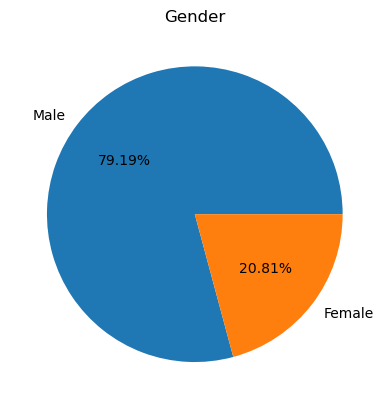

In [652]:
# ii) Gender:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct = '%1.2f%%')
plt.title ('Gender');

## Insights:
- About 79.19% of the cars buyers are Men and only 20.81% of them are Women.

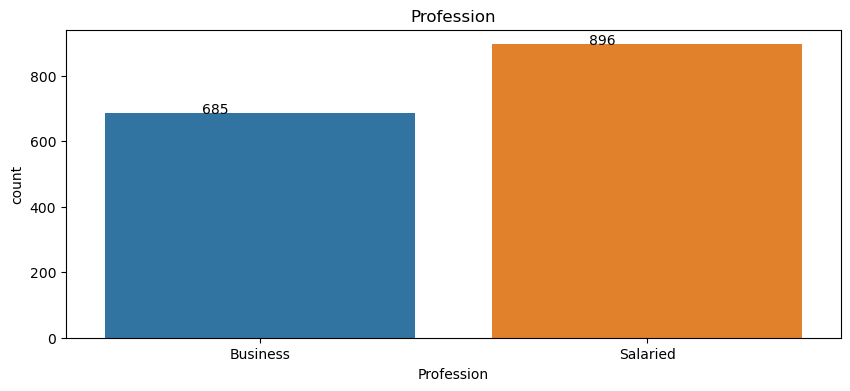

In [653]:
# iii) Profession:
plt.figure(figsize=(10, 4))
ax=sns.countplot(x="Profession", data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title ('Profession');

In [654]:
df.Profession.value_counts(normalize=True)

Salaried    0.56673
Business    0.43327
Name: Profession, dtype: float64

## Insights:
- Of 1581 car buyers, 896 of them are Salaried and 685 of them run Business, i.e., about 56.67% are salaried and 43.33% run Business.

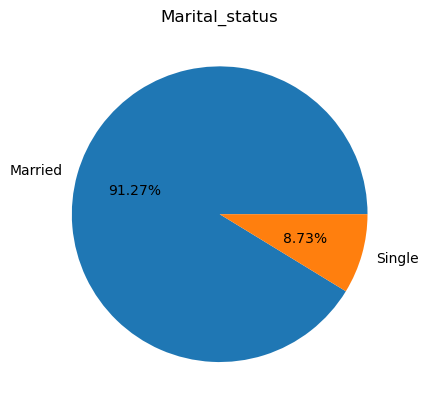

In [655]:
# iv) Marital status:
plt.pie(df['Marital_status'].value_counts(), labels=df['Marital_status'].value_counts().index, autopct = '%1.2f%%')
plt.title ('Marital_status');

## Insights:
- About 91.27% of customers are Married, which is very high, when compared with the people who are Single.
- Only 8.73% of customers are single.

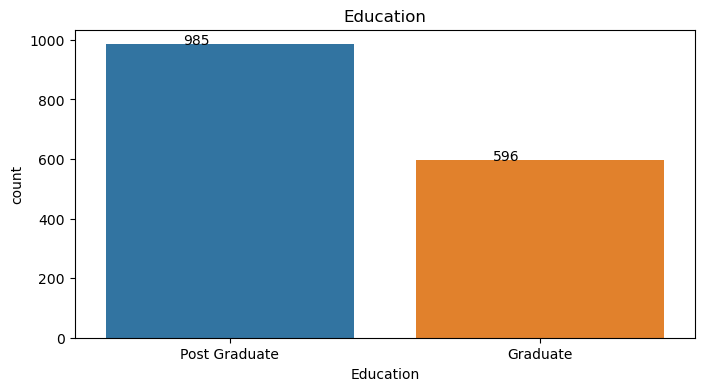

In [656]:
# v) Education:
plt.figure(figsize=(8, 4))
ax=sns.countplot(x="Education", data=df)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title ('Education');

In [657]:
df.Education.value_counts(normalize=True)

Post Graduate    0.623023
Graduate         0.376977
Name: Education, dtype: float64

## Insights:
- As per the data provided, Post Graduates (62.30%) are the more car buyers when compared with Graduates (37.70%).

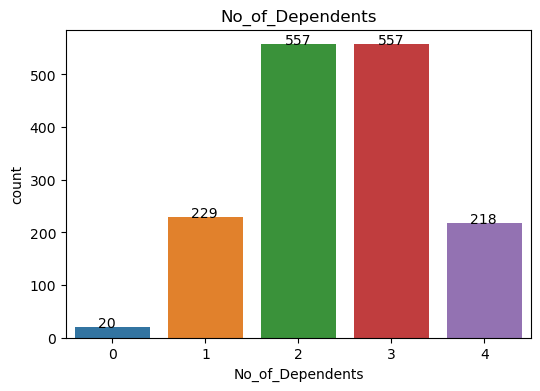

In [658]:
# vi) No_of_Dependents:
plt.figure(figsize=(6, 4))
ax=sns.countplot(x="No_of_Dependents", data=df)
plt.title ('No_of_Dependents')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

In [659]:
df.No_of_Dependents.value_counts(normalize=True)

3    0.352309
2    0.352309
1    0.144845
4    0.137887
0    0.012650
Name: No_of_Dependents, dtype: float64

## Insights:
- From the above graph, we can observe that customers with 2 or 3 dependents are the major car buyers (35.23% each).
- There is no much difference between the customers with 1 (14.48%) and 4 (13.79%) dependents.
- Only 1.27% of car buyers are with 0 dependent.

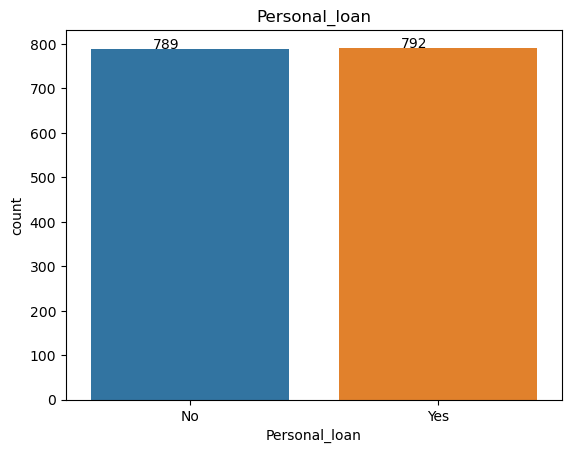

In [660]:
# vii) Personal Loan:
ax=sns.countplot(data=df, x='Personal_loan')
plt.title ('Personal_loan')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

## Insights:
- The above graph indicates that the Personal loan does not have any effect on the buying behaviour of the customers. 

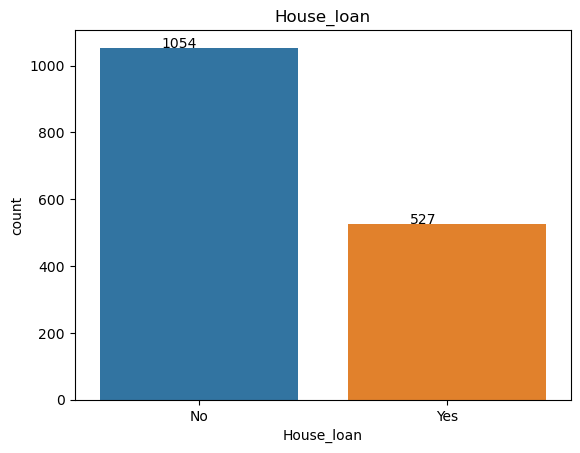

In [661]:
# viii) House Loan:
ax=sns.countplot(data=df, x='House_loan')
plt.title ('House_loan')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

In [662]:
df.House_loan.value_counts(normalize=True)

No     0.666667
Yes    0.333333
Name: House_loan, dtype: float64

## Insights:
- The above graph indicates that the House loan cause a major impact on the buying behaviour of the Customers. 
- 66.67% of the customers who buy cars do not have a house loan.
- 33.33% of car buyers have house loan. 

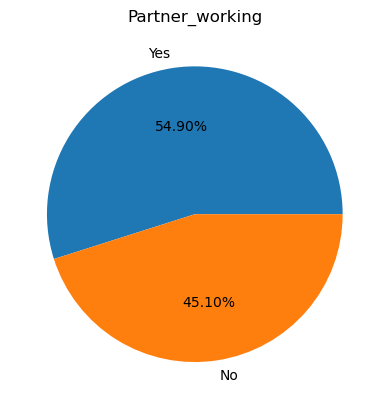

In [663]:
# ix) Partner working:
plt.pie(df['Partner_working'].value_counts(), labels=df['Partner_working'].value_counts().index, autopct = '%1.2f%%')
plt.title ('Partner_working');

## Insights:
- Of the 1581 customers who bought cars, 54.90% of them had their partner working and 45.10% of them either did not have a partner or had a partner but not working.

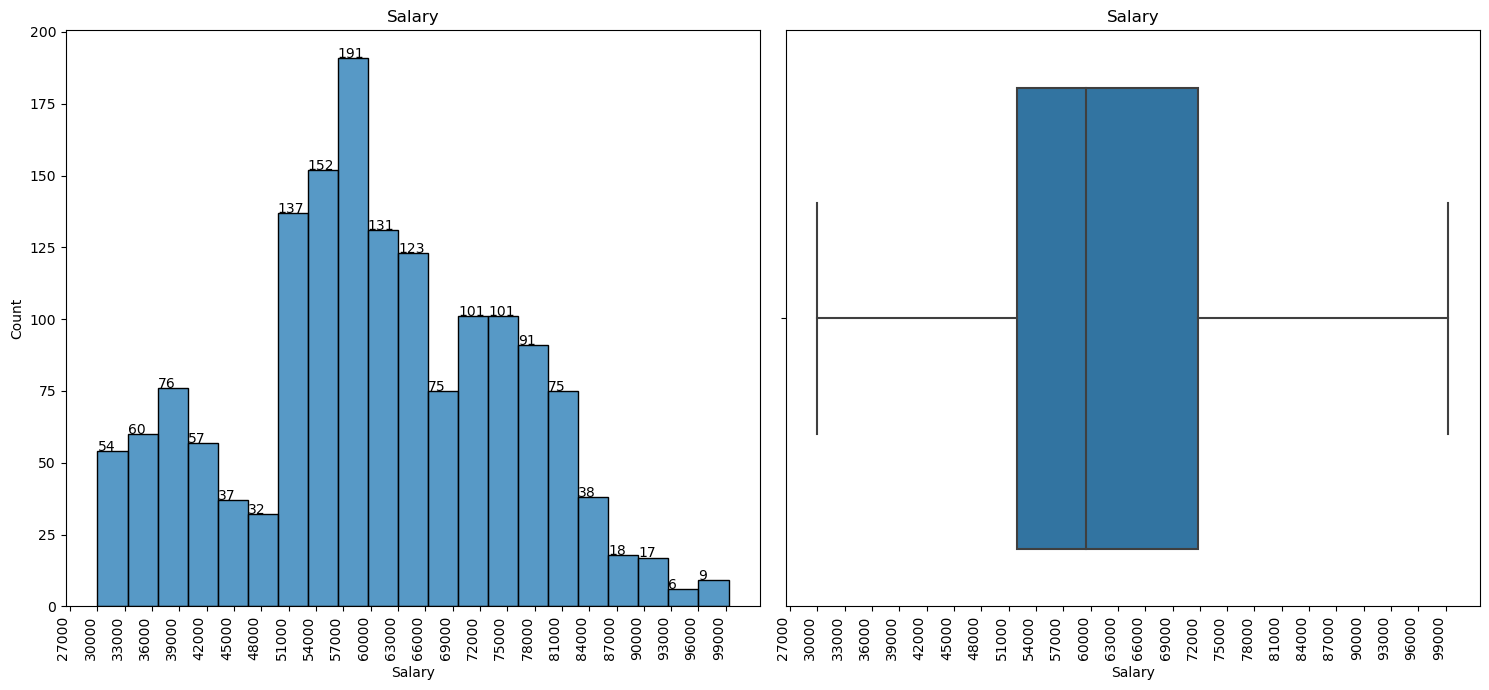

In [664]:
# x) Salary:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(15,7))
ax=sns.histplot(data=df, x='Salary', ax=axs[0])
plt.xticks(range(27000,100000,3000))
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.title.set_text('Salary')
fig.autofmt_xdate (rotation=90)
plt.setp(axs, xticks=(range(27000,100000,3000)))

sns.boxplot(x='Salary',data=df, ax=axs[1])
plt.title ('Salary')
fig.tight_layout();

In [665]:
df.Salary.describe()

count     1581.000000
mean     60392.220114
std      14674.825044
min      30000.000000
25%      51900.000000
50%      59500.000000
75%      71800.000000
max      99300.000000
Name: Salary, dtype: float64

In [666]:
df.Salary.median()

59500.0

## Insights:
- The salary range is from 30000 to 99300.
- As per the boxplot, most of the customers fall under 51900 - 71800 salary bracket.
- About 61 of 1581 customers have salary more than 85000.
- Mean salary of this group is 60392.22 and the Median salary is 59500. Here, mean is greater than the median, so the distribution of data is slightly skewed to the right.

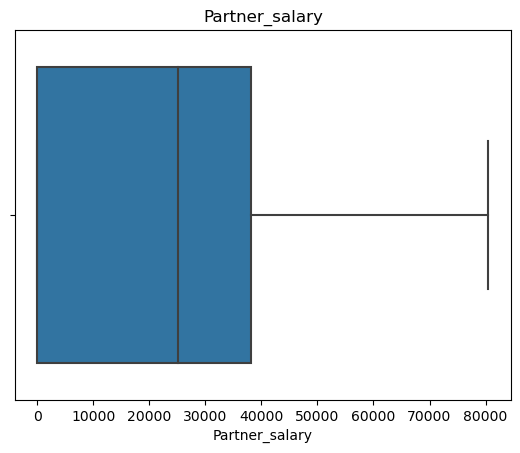

In [667]:
# xi) Partner salary:
sns.boxplot(x='Partner_salary',data=df)
plt.title ('Partner_salary');

In [668]:
df.Partner_salary.describe()

count     1581.000000
mean     19233.776091
std      19670.391171
min          0.000000
25%          0.000000
50%      25100.000000
75%      38100.000000
max      80500.000000
Name: Partner_salary, dtype: float64

## Insights:
- Partner salary ranges from 0 to 80500.
- Median of partner salary is 25100 and mean of partner salary is 19233.78. Hence, it is Left skewed distribution.
- 75% of the partner salary fall under 38100.

### Treating Outliers of Total Salary column:

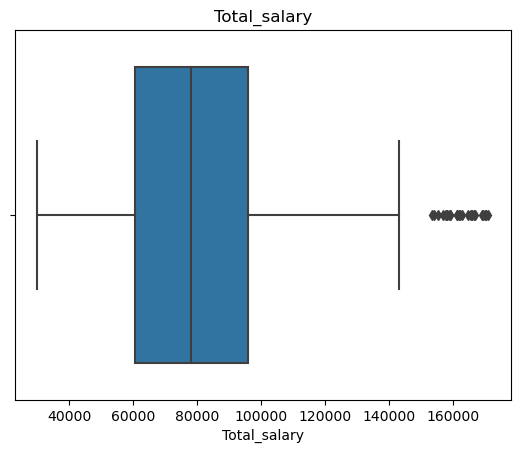

In [669]:
sns.boxplot(x='Total_salary',data=df)
plt.title ('Total_salary');

In [670]:
df.Total_salary.describe()

count      1581.000000
mean      79625.996205
std       25545.857768
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      171000.000000
Name: Total_salary, dtype: float64

In [671]:
def identify_outlier(func):
    Q1,Q3=np.percentile(func,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [672]:
lowr, uppr=identify_outlier(df['Total_salary'])
print('lower range is', lowr, 'and upper range', uppr)

lower range is 7400.0 and upper range 149000.0


In [673]:
df['Total_salary']=np.where(df['Total_salary']<lowr,lowr,df['Total_salary'])
df['Total_salary']=np.where(df['Total_salary']>uppr,uppr,df['Total_salary'])

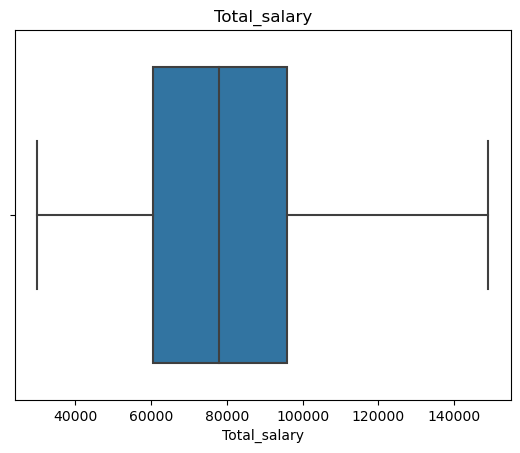

In [674]:
# xii) Total salary (After treating outliers):
sns.boxplot(x='Total_salary',data=df)
plt.title ('Total_salary');

In [675]:
df.Total_salary.describe()

count      1581.000000
mean      79398.545225
std       24849.147996
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      149000.000000
Name: Total_salary, dtype: float64

## Insights:
- Total salary ranges from 30000 to 149000.
- 75% of the total salary fall under 95900.
- Median of total salary is 78000 and mean of total salary is 79398.55. Hence, it is Right skewed distribution.

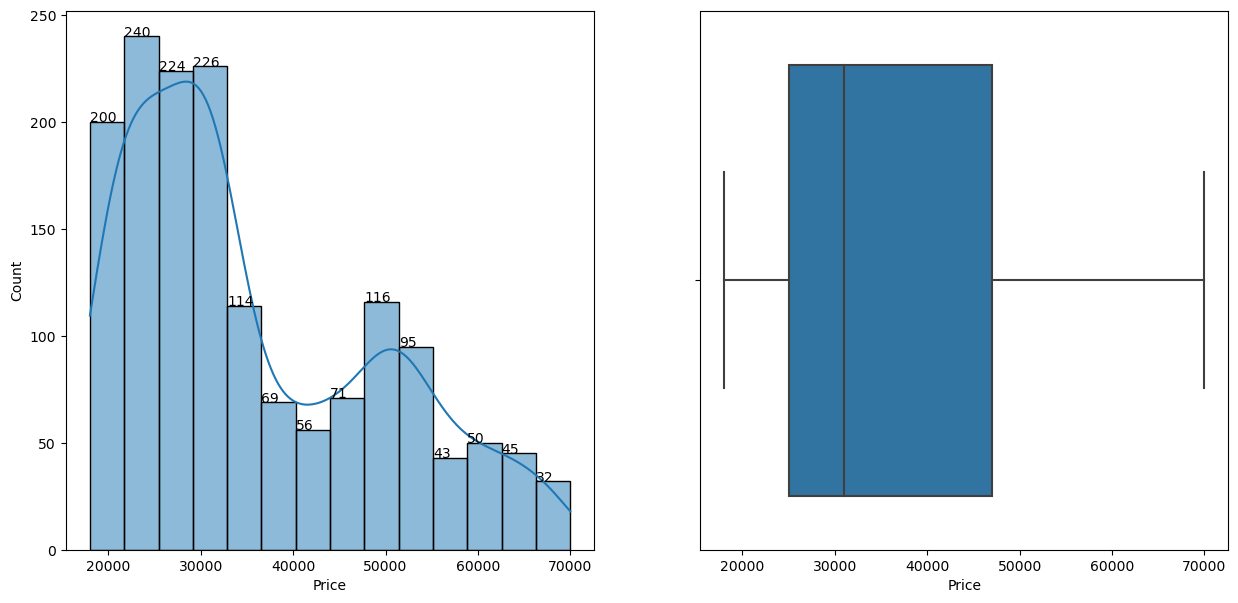

In [676]:
# xiii) Price:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(15,7))
ax=sns.histplot(df.Price, kde=True, ax=axs[0])
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
sns.boxplot(x='Price',data=df, ax=axs[1])
plt.show()  

In [677]:
df.Price.describe()

count     1581.000000
mean     35597.722960
std      13633.636545
min      18000.000000
25%      25000.000000
50%      31000.000000
75%      47000.000000
max      70000.000000
Name: Price, dtype: float64

## Insights:
- Price ranges from 18000 to 70000.
- Mean price of car is 35597.72 and the Median price is 31000. Here, mean is greater than the median, hence, distribution of data is slightly skewed to the right (Right skewed distribution).

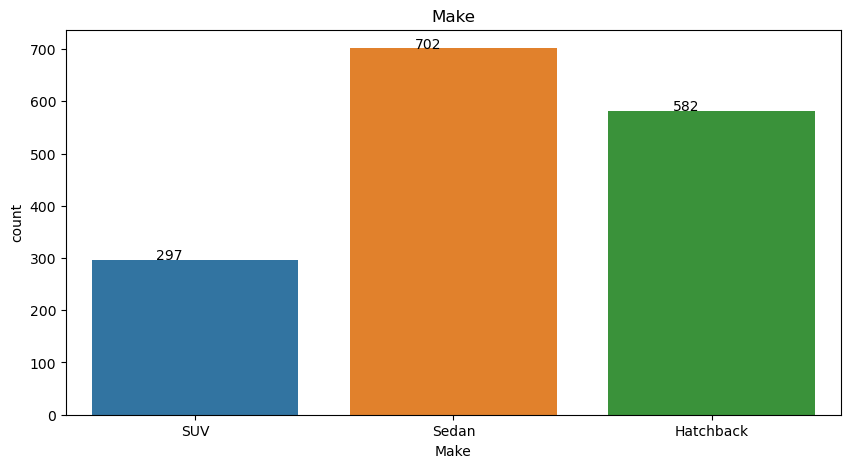

In [678]:
# xiv) Make:
plt.figure(figsize=(10, 5))
ax=sns.countplot(data=df, x='Make')
plt.title ('Make')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

In [679]:
df.Make.value_counts(normalize=True)

Sedan        0.444023
Hatchback    0.368121
SUV          0.187856
Name: Make, dtype: float64

## Insights:
- Most of the customers prefer Sedan over SUV and Hatchback.
- 44.40% of car buyers prefer Sedan, 36.81% prefer Hatchback and only 18.79% prefer SUV.

## 1.d) Ans:

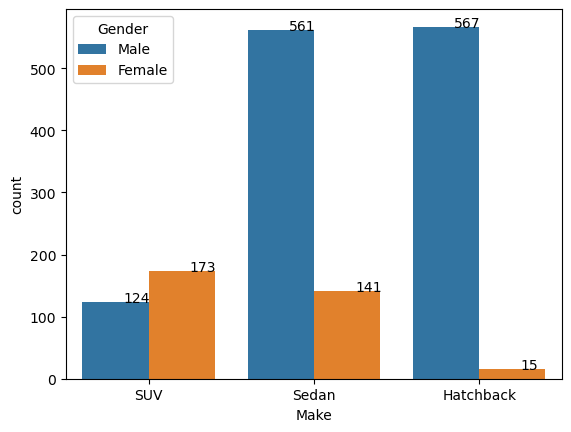

In [680]:
# i) Make and Gender:

ax=sns.countplot(data=df, x="Make", hue='Gender') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

## Insights:
- From the above graph, we can note that majority of the car buyers are Men.
- Men prefer Sedan and Hatchback over SUV. There is no much difference in buying behaviour of men who prefer Sedan and Hatchback.
- When it comes to SUV, women buy more than the men.
- A smaller number of women prefer Hatchback.

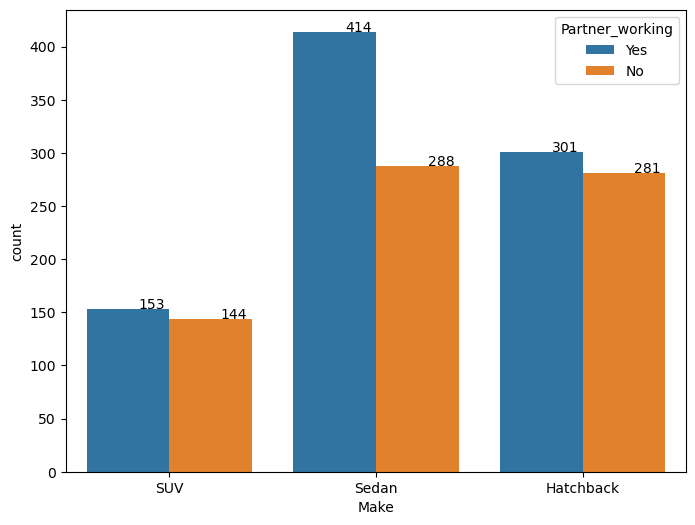

In [681]:
# ii) Make and Partner working:
plt.figure(figsize=(8,6))
ax=sns.countplot(data=df, x='Make', hue='Partner_working') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

## Insights:
- The above graph indicates that, customers who have working partners are the more buyers in all 3 car types. 
- Sedan is the most preferred car over Hatchback and SUV.
- There is no much difference between the customers who have working partners and prefer Hatchback and SUV,  with the customers who do not have working partners and have the same preference.

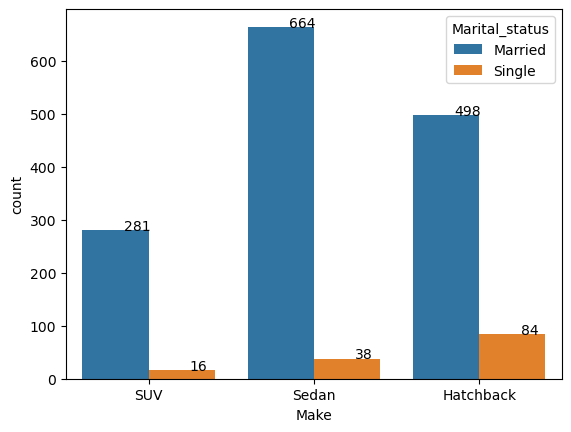

In [682]:
# iii) Make and Marital status:
ax=sns.countplot(data=df, x="Make", hue='Marital_status') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

## Insights:
- The data consists of 91.27% of Married and 8.73% of Singles.
- Car buyers who are married are dominating in all 3 car types.
- Most of the singles opt Hatchback and only fewer ones prefer SUV.
- Customers who are married prefer Sedan the most, followed by Hatchback.

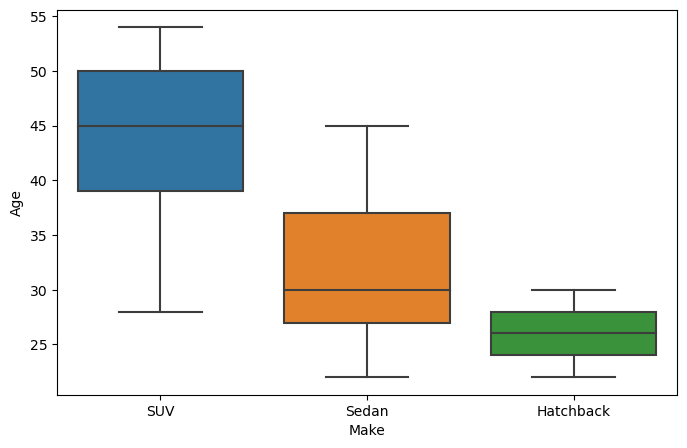

In [683]:
# iv) Age and Make:
plt.figure(figsize=(8,5))
ax=sns.boxplot(data=df, x="Make", y='Age');

In [684]:
df [df['Make']=='SUV'] ['Age'].describe()

count    297.000000
mean      43.989899
std        6.664491
min       28.000000
25%       39.000000
50%       45.000000
75%       50.000000
max       54.000000
Name: Age, dtype: float64

In [685]:
df [df['Make']=='Hatchback'] ['Age'].describe()

count    582.000000
mean      25.726804
std        2.500796
min       22.000000
25%       24.000000
50%       26.000000
75%       28.000000
max       30.000000
Name: Age, dtype: float64

In [686]:
df [df['Make']=='Sedan'] ['Age'].describe()

count    702.000000
mean      31.952991
std        6.520400
min       22.000000
25%       27.000000
50%       30.000000
75%       37.000000
max       45.000000
Name: Age, dtype: float64

## Insights:
- The above graph indicates that, median age of car buyers who prefer Hatchback is 26.
- Median age of car buyers who prefer SUV is 45 and Sedan is 30.
- Above 25% of SUV buyers are of 39 years of age.
- All the Hatchback buyers fall under 30 years of age.
- 75% of the Sedan buyers fall under 37 years of age.
- Customers of 46 to 54 years prefer only SUV.

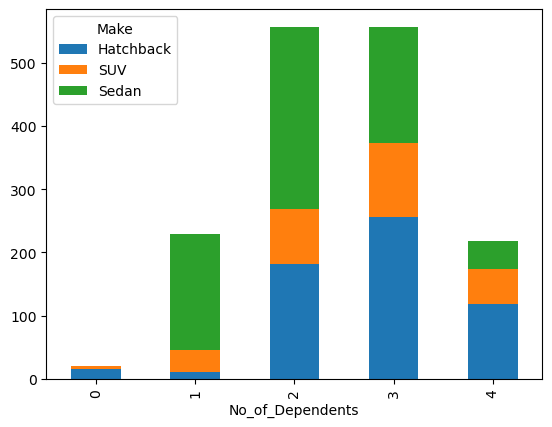

In [687]:
# v) No_of_Dependents and Make:
ct=pd.crosstab(df['No_of_Dependents'], df['Make'])
ct.plot(kind='bar', stacked=True);

## Insights:
- From the above graph, we can observe that customers with 2 or 3 dependents are the major car buyers.
- A small number of people with 0 dependents buy car.
- Customers with 1 dependent prefer Sedan the most, then comes the SUV.
- Major contributors for the hatchback are the ones with 3 dependents.

In [688]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

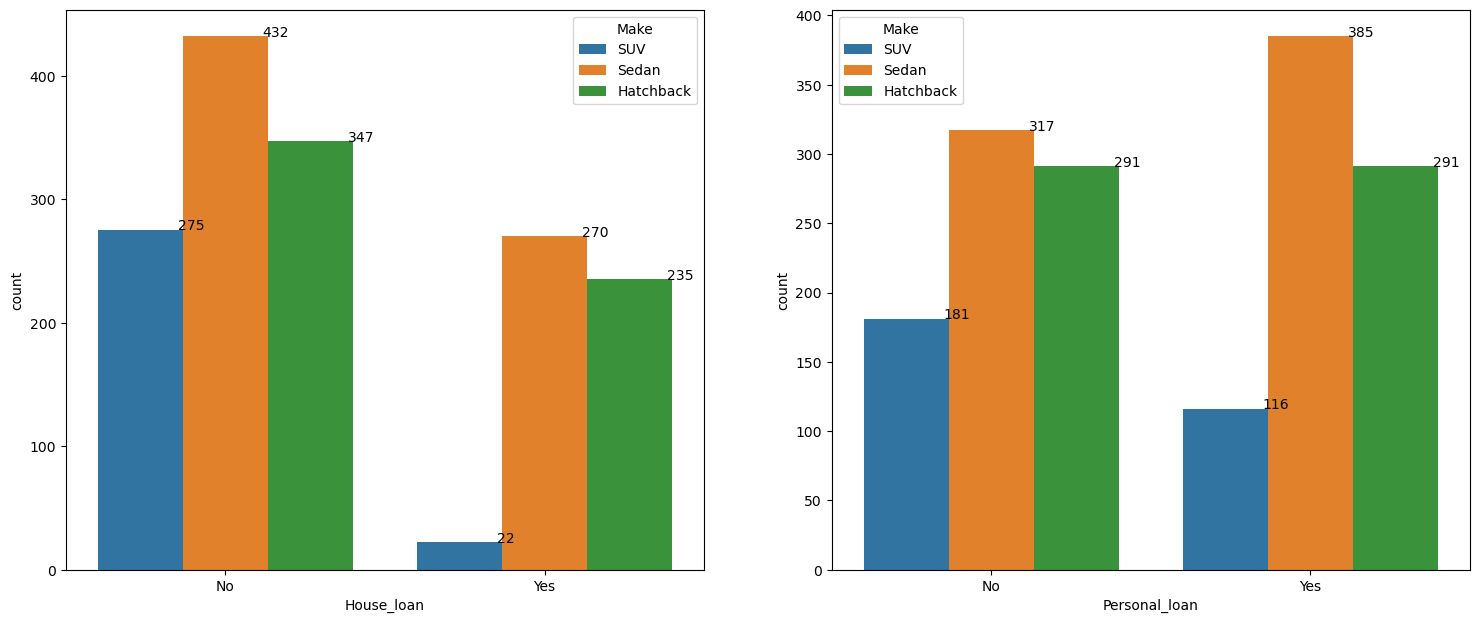

In [689]:
# vi) Personal loan, House loan and Make:
plt.figure(figsize=(28,16))
plt.subplot(2,3,1)
ax=sns.countplot(data=df, x="House_loan", hue='Make') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.subplot(2,3,2)
ax=sns.countplot(data=df, x="Personal_loan", hue='Make') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

## Insights:
- House loan: 
- The above graph indicates that the customers who do not have house loan are the major buyers when compared with the customer who have house loan.
- House loan effect the buying behaviour of the customers.
- Majority of SUV buyers are the ones without house loan.
- In all 3 car types, customers without house loan are the major buyers.
- Personal loan: 
- There is no difference between the hatchback buyers who have or do not have personal loan.
- Customers with personal loan prefer Sedan the most and SUV the least.
- Customers without personal loan prefer SUV more than the ones with personal loan.

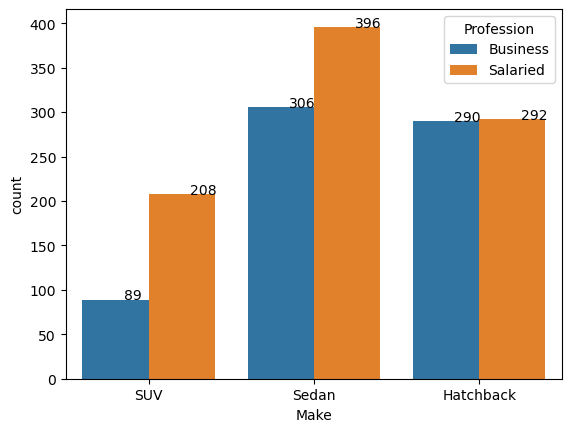

In [690]:
# vii) Profession and Make:
ax=sns.countplot(data=df, x="Make", hue='Profession') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

## Insights:
- Salaried people are the major Sedan buyers when compared with the ones who run business.
- There is no major difference between the salaried buyers and business people who prefer hatchback.
- Both the group prefer SUV the least over Sedan and Hatchback.

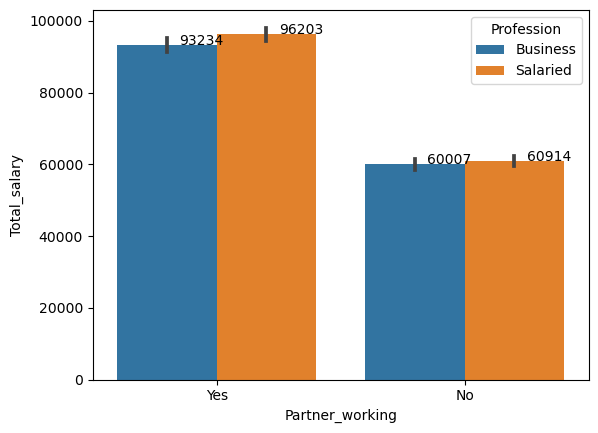

In [691]:
# viii) Partner working and Total salary:
ax=sns.barplot(data=df, x="Partner_working", y='Total_salary', hue='Profession') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

## Insights:
- Salaried customers whose partners are working, have mean total salary of 96203, which is more when compared with the business customers who have working partners and have their mean total salary of 93234.
- Mean total salary of business and salaried customers whose partners are not working is 60007 and 60914.

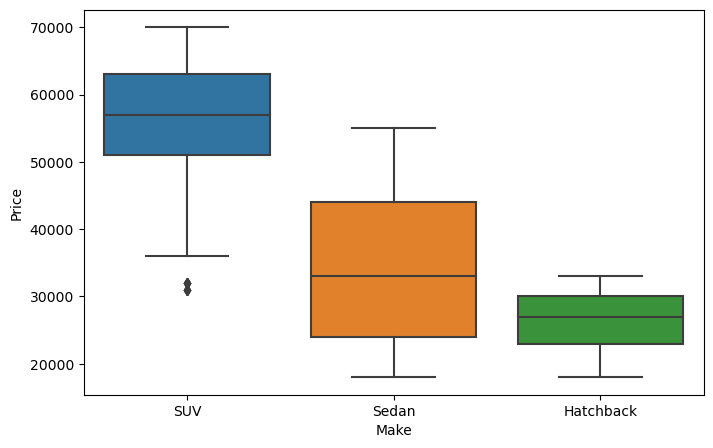

In [692]:
# ix) Price and Make:
plt.figure(figsize=(8,5))
ax=sns.boxplot(data=df, x="Make", y='Price');

In [693]:
df [df['Make']=='SUV'] ['Price'].describe()

count      297.000000
mean     55824.915825
std       9218.242714
min      31000.000000
25%      51000.000000
50%      57000.000000
75%      63000.000000
max      70000.000000
Name: Price, dtype: float64

In [694]:
df [df['Make']=='Sedan'] ['Price'].describe()

count      702.000000
mean     34603.988604
std      11152.164304
min      18000.000000
25%      24000.000000
50%      33000.000000
75%      44000.000000
max      55000.000000
Name: Price, dtype: float64

In [695]:
df [df['Make']=='Hatchback'] ['Price'].describe()

count      582.000000
mean     26474.226804
std       4290.467640
min      18000.000000
25%      23000.000000
50%      27000.000000
75%      30000.000000
max      33000.000000
Name: Price, dtype: float64

## Insights:
- Price range of SUV is from 31000 and goes up to 70000. Median price of the SUV is 57000.
- Price range of Sedan is from 18000 and goes up to 55000. Median price of the Sedan is 33000.
- Price range of Hatchback is from 18000 and goes up to 33000. Median price of the Hatchback is 27000.

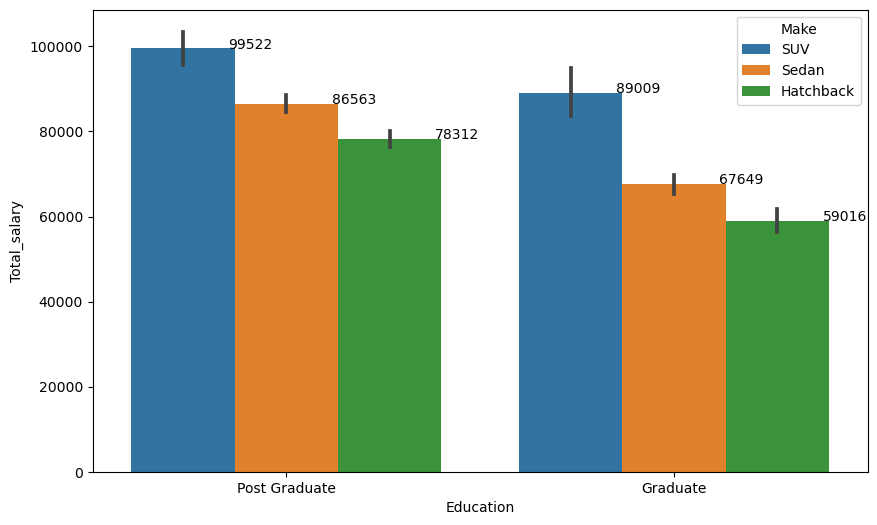

In [696]:
# ix) Education, Make and Total salary:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=df, x="Education", y='Total_salary', hue='Make') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

## Insights:
- Mean total salary of Post Graduate customers who prefer SUV is 99522.
- Mean total salary of Graduate customers who prefer SUV is 89009.
- Mean total salary of Post Graduate customers who prefer Sedan is 86563.
- Mean total salary of Graduate customers who prefer Sedan is 67649.
- Mean total salary of Post Graduate customers who prefer Hatchback is 78312.
- Mean total salary of Graduate customers who prefer Hatchback is 59016.

## 1.e) Ans:
## E1)

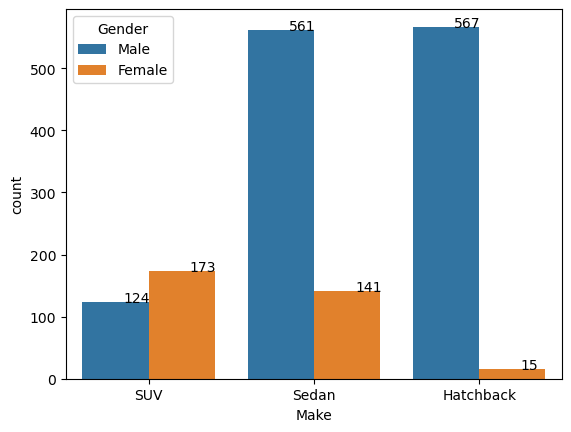

In [697]:
# E1):
ax=sns.countplot(data=df, x="Make", hue='Gender') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [698]:
df.groupby('Make') ['Gender'].value_counts(normalize=True)

Make       Gender
Hatchback  Male      0.974227
           Female    0.025773
SUV        Female    0.582492
           Male      0.417508
Sedan      Male      0.799145
           Female    0.200855
Name: Gender, dtype: float64

## Ans: False, women prefer SUV more than men, by referring to the above bar graph we can note that women buy more SUV’s when compared with the men. According to the data provided, 58.25% of SUVs are bought by women and 41.75% by men.

## E2

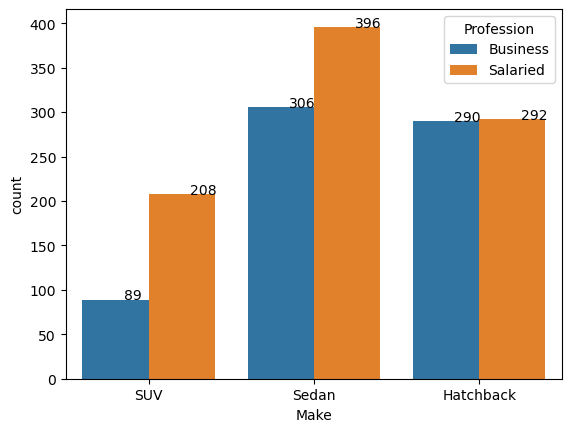

In [699]:
# E2):
ax=sns.countplot(data=df, x="Make", hue='Profession') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [700]:
df.groupby('Profession') ['Make'].value_counts(normalize=True)

Profession  Make     
Business    Sedan        0.446715
            Hatchback    0.423358
            SUV          0.129927
Salaried    Sedan        0.441964
            Hatchback    0.325893
            SUV          0.232143
Name: Make, dtype: float64

## Ans: Yes, salaried person prefers Sedan the most. About 44.20% of the cars bought by salaried persons are Sedan, followed by Hatchback (32.59%) and SUV (23.21%).

## E3

In [701]:
#Dataframe consists only Male
df_new=df[['Profession','Make']] [df['Gender']=='Male']
df_new.head(2)

,Profession,Make
0,Business,SUV
4,Salaried,SUV


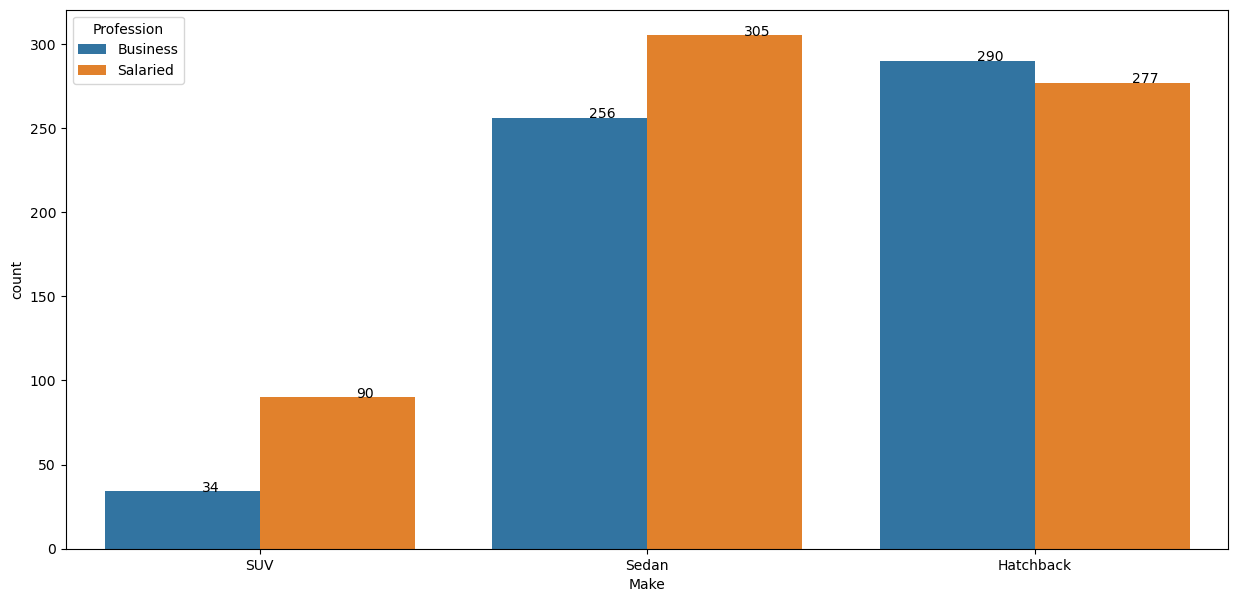

In [702]:
#E3)
plt.figure(figsize=(15,7))
ax=sns.countplot(data=df_new, x="Make", hue='Profession') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

In [703]:
df_new.groupby('Profession') ['Make'].value_counts(normalize=True)

Profession  Make     
Business    Hatchback    0.500000
            Sedan        0.441379
            SUV          0.058621
Salaried    Sedan        0.453869
            Hatchback    0.412202
            SUV          0.133929
Name: Make, dtype: float64

## Ans: False, the above graph consists the data only about Men, and by referring the same we can say that easier target for a salaried male is Sedan, and not SUV. About 45.39% of Sedan cars and bought by salaried men, and only, 13.39% of SUVs are bought by salaried men. 

## 1.F)

## F1) Gender

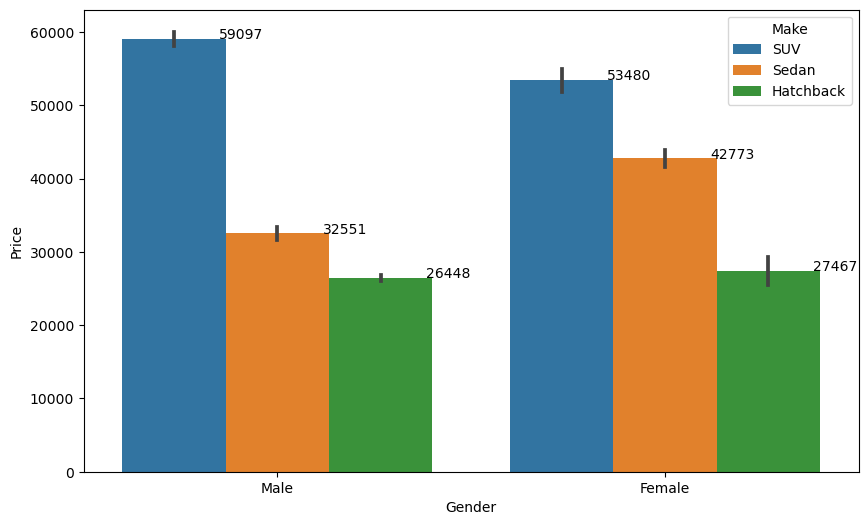

In [704]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=df, x="Gender", y='Price', hue='Make') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

## Insights:
- Mean price spent by men to buy SUV is 59097.
- Mean price spent by women to buy SUV is 53480.
- Mean price spent by men to buy Sedan is 32551.
- Mean price spent by women to buy Sedan is 42773.
- Mean price spent by men to buy Hatchback is 26448.
- Mean price spent by women to buy Hatchback is 27467.

In [705]:
df.groupby('Gender') ['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,329.0,47705.167173,11244.836378,20000.0,38000.0,49000.0,55000.0,69000.0
Male,1252.0,32416.134185,12366.253107,18000.0,23000.0,29000.0,37000.0,70000.0


## Insights:
- Women:
- Mean and Median price spent by women on purchasing automobiles is 47705.17 and 49000. 
- Median is greater than the Mean. Hence, negatively skewed distribution.
- Amount spent on buying automobiles by women ranges from 20000 to 69000.
- Men:
- Mean and Median price spent by men on purchasing automobiles is 32416.13 and 29000.
- Mean is greater than the Median. Hence, positively skewed distribution.
- Amount spent on buying automobiles by men ranges from 18000 to 70000.

Conclusion:
By referring to the above buying patterns (i.e., mean and median price spent on each car segmentation) of both men and women, business needs to strategize and come up with a model that suits spending behaviour of customers and their preference on car types.

## F2) Personal loan

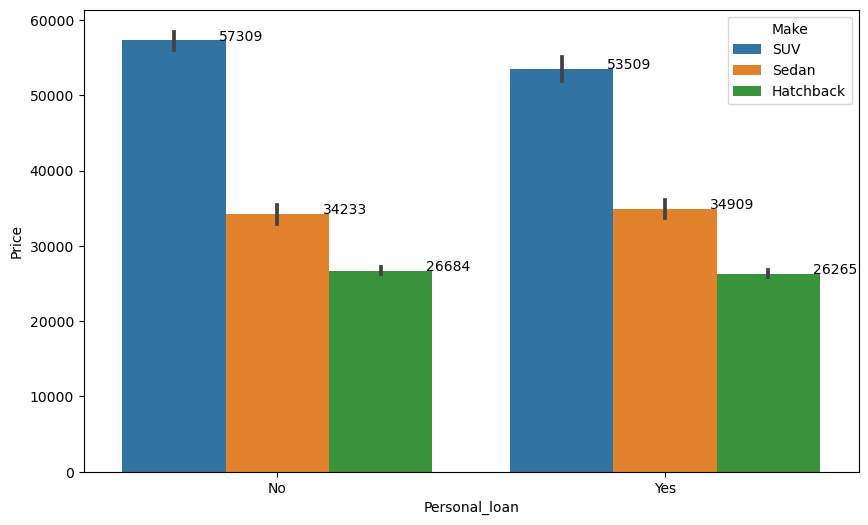

In [706]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=df, x="Personal_loan", y='Price', hue='Make') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [707]:
df.groupby('Personal_loan') ['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_loan,,,,,,,,
No,789.0,36742.712294,14534.344526,18000.0,25000.0,32000.0,49000.0,70000.0
Yes,792.0,34457.070707,12578.780338,18000.0,24000.0,31000.0,45000.0,70000.0


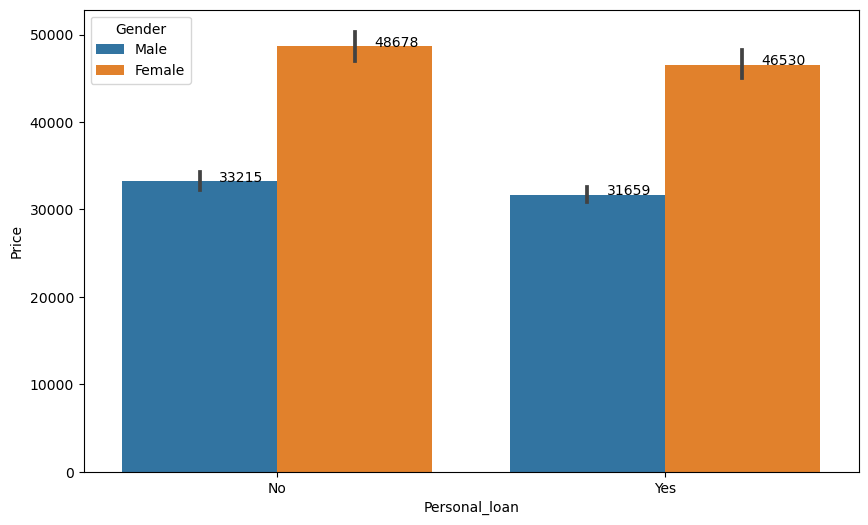

In [708]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=df, x="Personal_loan", y='Price', hue='Gender') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [709]:
df.groupby('Personal_loan') ['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_loan,,,,,,,,
No,789.0,36742.712294,14534.344526,18000.0,25000.0,32000.0,49000.0,70000.0
Yes,792.0,34457.070707,12578.780338,18000.0,24000.0,31000.0,45000.0,70000.0


## Insights:
- Personal loan does not affect the buying behaviour of customers who prefer Sedan and Hatchback.
- We can observe that people with no personal loan tend to buy more SUVs when compared with the ones with personal loan.
- The above graph indicates that, both men and women who do not have personal loan tend to spend slightly more. 
- There is no much difference between the buying behaviour of customers (both men and women) with or without personal loan.

Conclusion:
Mean price of women is higher than men, but personal loan does not affect both men and women on their spending behaviour, as we noted just a slight difference between the ones with and without personal loan.

## 1.G)

In [710]:
df.groupby('Partner_working') ['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Partner_working,,,,,,,,
No,713.0,36000.000000,13817.734086,18000.0,25000.0,31000.0,48000.0,70000.0
Yes,868.0,35267.281106,13479.532555,18000.0,24000.0,31000.0,46000.0,70000.0


## Insights:
- Mean price of customers whose partners are working is 35267.28, which is less when compared with the mean price of customers whose partners are not working i.e., 36000.
- Median price of both the customers whose partners are working and not working is 31000.
- Here, mean is greater than median in both the cases, so it is positively skewed distribution.

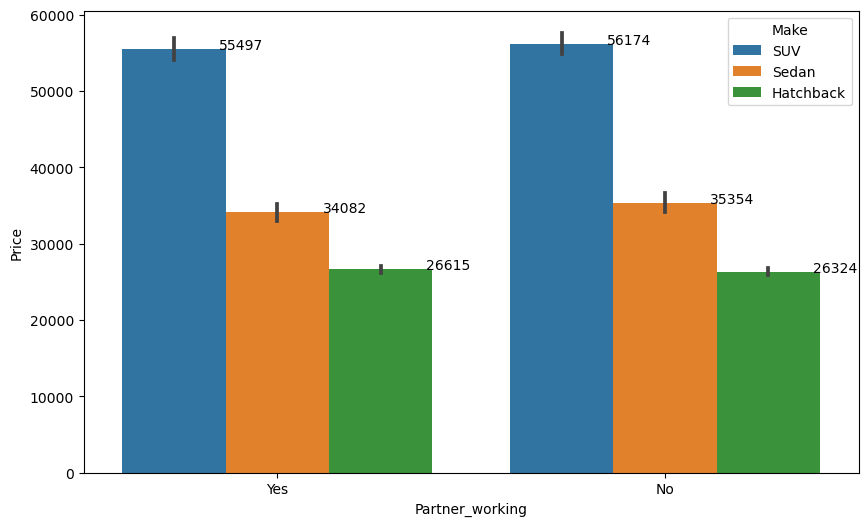

In [711]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=df, x="Partner_working", y='Price', hue='Make') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

## Insights:
- Mean price of customers whose partners are working and prefer SUV is 55497.
- Mean price of customers whose partners are not working and prefer SUV is 56174.
- Mean price of customers whose partners are working and prefer Sedan is 34082.
- Mean price of customers whose partners are not working and prefer Sedan is 35354.
- Mean price of customers whose partners are working and prefer Hatchback is 26615.
- Mean price of customers whose partners are not working and prefer Hatchback is 26324.

Conclusion:
By referring to the above data, we can say that, having a working partner does not lead to the purchase of a higher-priced car. Mean price spent on both SUV and Sedan by the customers who have working partners is less when compared with customers who do not have working partners.

# 1.H)

In [712]:
df_n=pd.crosstab(df['Gender'], df['Marital_status'], margins=True, normalize=True)
df_n

Marital_status,Married,Single,All
Gender,,,
Female,0.194181,0.013915,0.208096
Male,0.718533,0.073371,0.791904
All,0.912713,0.087287,1.000000


In [713]:
df_n.drop(['All'], axis=0, inplace=True)
df_n.drop(['All'], axis=1, inplace=True)

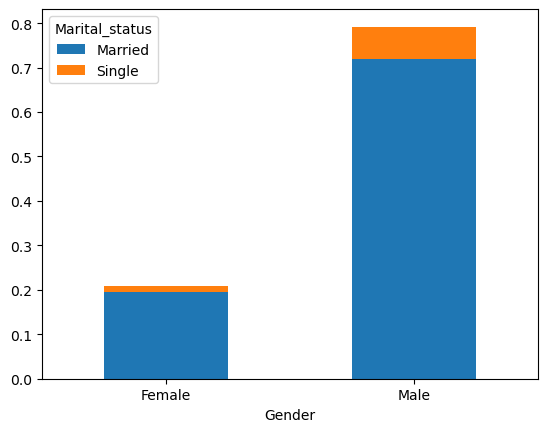

In [714]:
df_n.plot(kind='bar', stacked = True, rot=0);

## Insights:
- Of 79.19% of male car buyers, 71.85% of them are married. 
- About 19.42% of car buyers are women who are married.
- 8.73% of car buyers are singles, of which 7.34% are men and 1.39% are women.
- 71.85% of married men and 19.42% of married women are the major car buyers.  

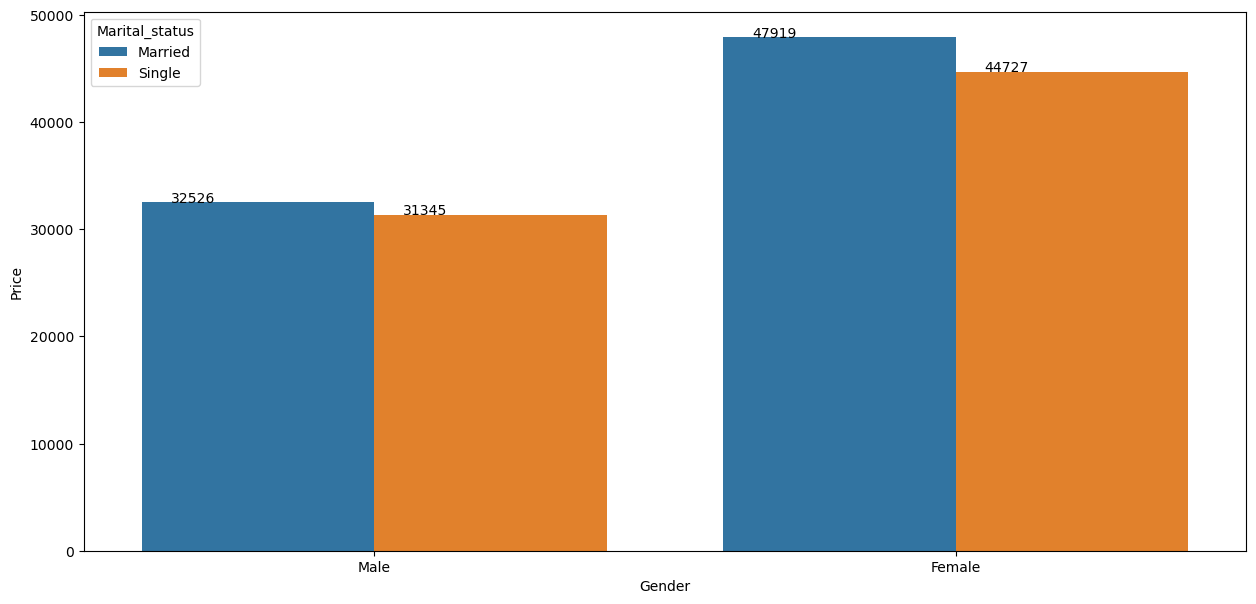

In [715]:
fig, ax = plt.subplots(figsize=(15, 7)) 
ax=sns.barplot(df, x='Gender', y='Price', hue='Marital_status', ci=None)
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01))
plt.show()

## Insights:
- Average price spent by Married men on car purchase is 32526.
- Average price spent by Married women on car purchase is 47919.
- Average price spent on car purchase by unmarried men is 31345.
- Average price spent on car purchase by unmarried women is 44727.
- Average amount spent by married men is slightly higher than the male singles 
- On an average we can observe that, both married and unmarried women spend more than married and unmarried men on car purchase. 

In [716]:
df_married = df [df['Marital_status']=='Married']

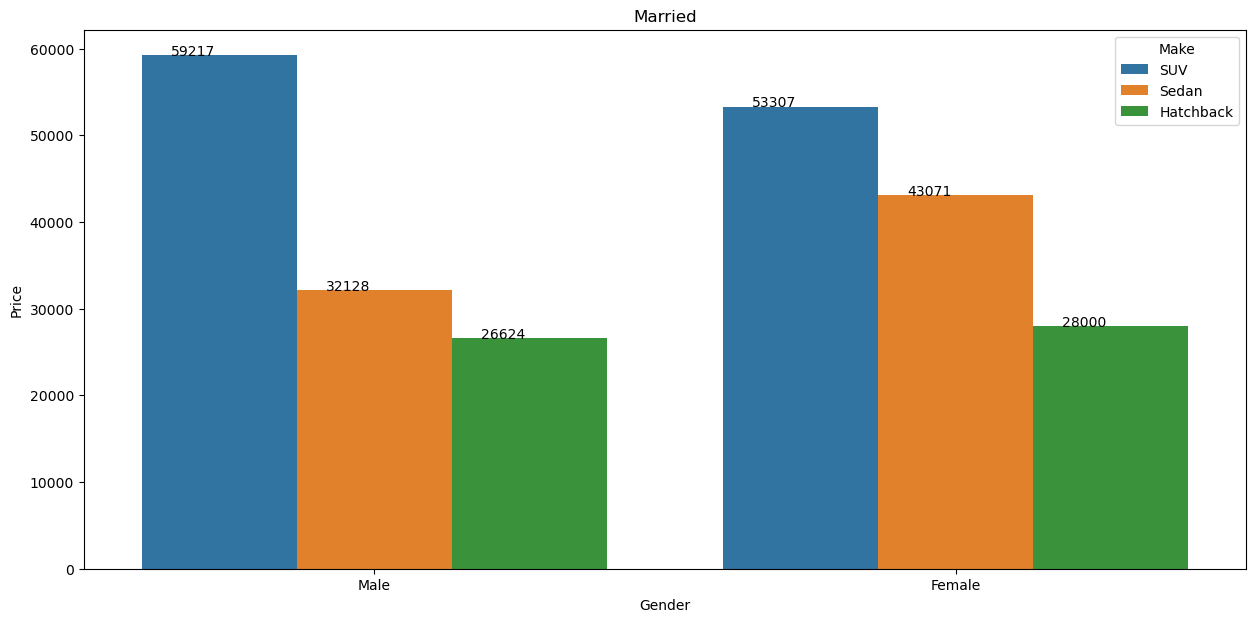

In [717]:
fig, ax = plt.subplots(figsize=(15, 7)) 
ax=sns.barplot(df_married, x='Gender', y='Price', hue='Make', ci=None)
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01))
plt.title ('Married')    
plt.show()

## Insights:
- Mean price spent by married men on SUV is 59217.
- Mean price spent by married women on SUV is 53307.
- Mean price spent by married men on Sedan is 32128.
- Mean price spent by married women on Sedan is 43071.
- Mean price spent by married men on Hatchback is 32128.
- Mean price spent by married women on Hatchback is 43071.
- Married women spent more than married men on buying Sedan and Hatchback.
- Married men when compared with married women spent more on SUV.

In [718]:
df_singles = df [df['Marital_status']=='Single']

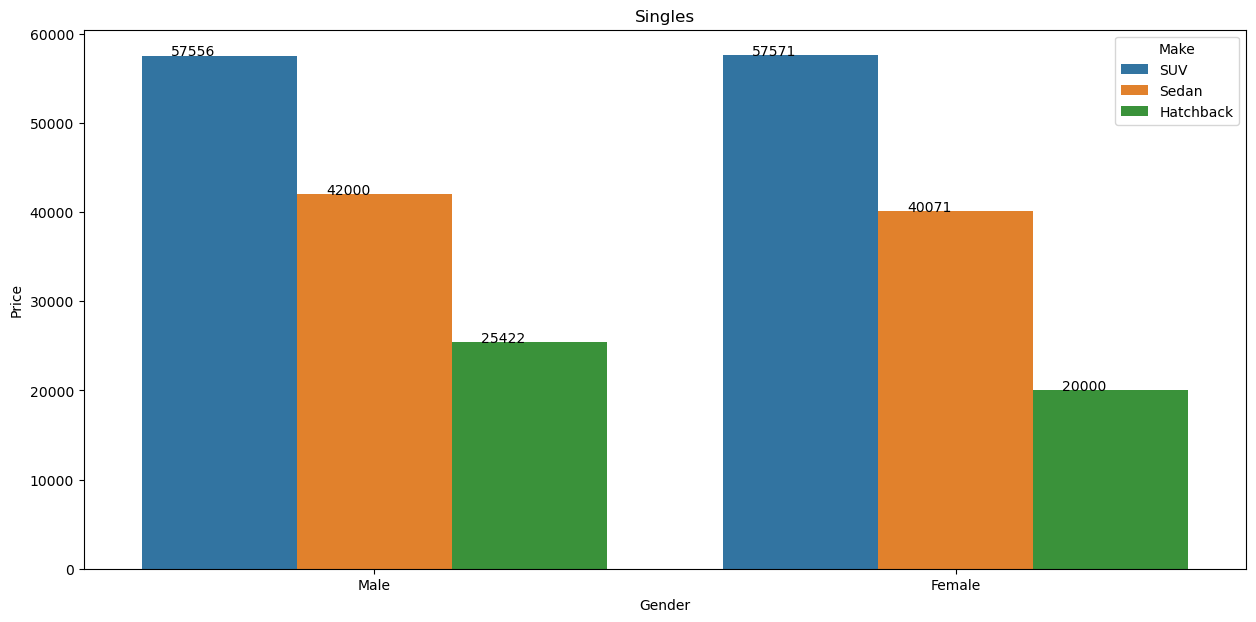

In [719]:
fig, ax = plt.subplots(figsize=(15, 7)) 
ax=sns.barplot(df_singles, x='Gender', y='Price', hue='Make', ci=None)
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01))
plt.title ('Singles')
plt.show()

## Insights:
- There is no major difference between the amount spent on SUV by single men and women (i.e., 57556 and 57571).
- For Sedan, spending behaviour of single men (42000) is slightly higher than the single women (40071).
- Single men prefer Hatchback more than single women. Mean price of single men and women is 25422 and 20000.

In [720]:
df_married_male = df [(df['Marital_status']=='Married') & (df['Gender']=='Male')]
df_married_female = df [(df['Marital_status']=='Married') & (df['Gender']=='Female')]
df_single_male = df [(df['Marital_status']=='Single') & (df['Gender']=='Male')]
df_single_female = df [(df['Marital_status']=='Single') & (df['Gender']=='Female')]

In [721]:
# Married Male:
df_married_male.groupby('Make') ['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Hatchback,484.0,26623.966942,4327.092651,19000.0,23000.0,28000.0,30000.0,33000.0
SUV,115.0,59217.391304,5845.650068,49000.0,55000.0,59000.0,64000.0,70000.0
Sedan,537.0,32128.491620,10971.820595,18000.0,23000.0,29000.0,41000.0,55000.0


## Insights:
- Married male prefers the Sedan the most and SUV the least.
- Mean price spent on SUV is the highest.
- Standard deviation of Sedan is high over SUV and Hatchback. i.e., on the upper side from the average.

In [722]:
# Married Female:
df_married_female.groupby('Make') ['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Hatchback,14.0,28000.000000,3843.075691,22000.0,25000.0,28500.0,31750.0,33000.0
SUV,166.0,53307.228916,10468.229373,31000.0,48250.0,55000.0,62000.0,69000.0
Sedan,127.0,43070.866142,7088.086475,32000.0,37000.0,43000.0,50000.0,55000.0


## Insights:
- Most preferred car by married women is SUV.
- Hatchback is least preferred when compared with other car types.

In [723]:
# Single Male:
df_single_male.groupby('Make') ['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Hatchback,83.0,25421.686747,3954.375415,18000.0,23000.0,25000.0,28000.0,33000.0
SUV,9.0,57555.555556,7333.333333,49000.0,51000.0,59000.0,62000.0,68000.0
Sedan,24.0,42000.000000,7494.925820,31000.0,34750.0,42500.0,47000.0,55000.0


## Insights:
- Single men are the second least car buyers in the group.
- Hatchback is the preferred car type.
- Single men bought SUV the least.

In [724]:
# Single Female:
df_single_female.groupby('Make') ['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Hatchback,1.0,20000.000000,NaN,20000.0,20000.0,20000.0,20000.0,20000.0
SUV,7.0,57571.428571,7322.502825,49000.0,52000.0,55000.0,64500.0,66000.0
Sedan,14.0,40071.428571,8370.867851,31000.0,32250.0,38000.0,46000.0,55000.0


## Insights:
- Single women prefer Sedan the most and Hatchback the least.
- Lease car buyers when compared with the group.

Conclusion:
- According to the data provided, married men (with 71.85% of total car purchase) are the large buyers followed by married women (19.42%), single men (7.34%) and single women (1.34%). 
- We can say that married people prefer car more than the singles.
- When we consider the average price spent on car purchase, women tend to spend more than men. Married women are the highest in terms of average price followed by the unmarried women. 
- Average price spent by men is much lower than that of women. Married men tend to spend slightly higher than the single men.
- By referring to the statistical summary of data, we can observe that married male prefers Sedan over Hatchback and SUV. 
- Married female prefers SUV over Sedan and Hatch back.
- 7.34% of purchases are made by the single men. They prefer Hatchback the most.
- Only 1.39% purchases are made by the single women. They prefer Sedan the most and hatchback the least.



# Problem 2

In [725]:
df_go=pd.read_excel("godigt_cc_data.xlsx")
df_go.head(2)

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000


In [726]:
df_go.shape

(8448, 28)

In [727]:
df_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [728]:
df_go.describe()

,userid,card_bin_no,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,widget_products,engagement_products,annual_income_at_source,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,avg_spends_l3m,cc_limit
count,8448.00000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8.448000e+03,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000
mean,4224.50000,436747.044508,0.292377,0.494792,0.642045,0.284091,0.484493,0.632339,3.614583,3.991122,1.674595e+06,33.164181,0.111269,0.047940,0.080374,0.008878,0.009470,49527.365530,251706.912879
std,2438.87187,30489.752417,0.454881,0.500002,0.479427,0.451007,0.499789,0.482197,2.273193,2.572135,1.064307e+06,15.868344,0.314483,0.213653,0.271888,0.093809,0.096856,46244.954836,229114.856385
min,1.00000,376916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000950e+05,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2112.75000,426241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.061104e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17110.000000,90000.000000
50%,4224.50000,437551.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.372134e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37943.000000,150000.000000
75%,6336.25000,438439.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,1.881734e+06,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66095.750000,350000.000000
max,8448.00000,524178.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,8.000000,4.999508e+06,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,289292.000000,990000.000000


In [729]:
df_go.describe(include='object')

,card_no,Issuer,card_type,high_networth,hotlist_flag,other_bank_cc_holding,Transactor_revolver,Occupation_at_source
count,8448,8448,8448,8448,8448,8448,8410,8448
unique,11,3,15,5,2,2,2,6
top,4262 41XX XXXX XXXX,Visa,rewards,A,N,Y,T,Salaried
freq,2084,7279,1502,1740,8410,4728,7115,3918


In [730]:
df_go.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [731]:
df_go.Transactor_revolver.unique()

array(['T', 'R', nan], dtype=object)

In [732]:
mode2=df_go['Transactor_revolver'].mode().values[0]
df_go['Transactor_revolver']=df_go['Transactor_revolver'].replace(np.nan, mode2)

In [733]:
df_go.isnull().sum()

userid                     0
card_no                    0
card_bin_no                0
Issuer                     0
card_type                  0
card_source_date           0
high_networth              0
active_30                  0
active_60                  0
active_90                  0
cc_active30                0
cc_active60                0
cc_active90                0
hotlist_flag               0
widget_products            0
engagement_products        0
annual_income_at_source    0
other_bank_cc_holding      0
bank_vintage               0
T+1_month_activity         0
T+2_month_activity         0
T+3_month_activity         0
T+6_month_activity         0
T+12_month_activity        0
Transactor_revolver        0
avg_spends_l3m             0
Occupation_at_source       0
cc_limit                   0
dtype: int64

In [734]:
df_go.describe(include='object')

,card_no,Issuer,card_type,high_networth,hotlist_flag,other_bank_cc_holding,Transactor_revolver,Occupation_at_source
count,8448,8448,8448,8448,8448,8448,8448,8448
unique,11,3,15,5,2,2,2,6
top,4262 41XX XXXX XXXX,Visa,rewards,A,N,Y,T,Salaried
freq,2084,7279,1502,1740,8410,4728,7153,3918


In [735]:
df_go.columns

Index(['userid', 'card_no', 'card_bin_no', 'Issuer', 'card_type',
       'card_source_date', 'high_networth', 'active_30', 'active_60',
       'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       'annual_income_at_source', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       'avg_spends_l3m', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

## 2.a) Annual income at source

## i) Annual income at source and Average spends l3m:

<Figure size 1500x700 with 0 Axes>

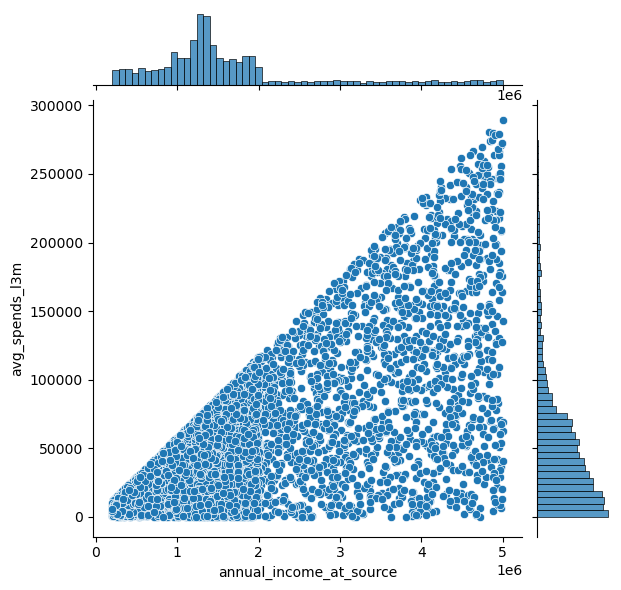

In [736]:
plt.figure(figsize=(15,7))
ax=sns.jointplot(data=df_go, x='annual_income_at_source', y='avg_spends_l3m');

In [737]:
df_go[['annual_income_at_source', 'avg_spends_l3m']].corr()

,annual_income_at_source,avg_spends_l3m
annual_income_at_source,1.000000,0.684695
avg_spends_l3m,0.684695,1.000000


In [738]:
df_go[['annual_income_at_source', 'avg_spends_l3m']].describe().T

,count,mean,std,min,25%,50%,75%,max
annual_income_at_source,8448.0,1.674595e+06,1.064307e+06,200095.0,1061104.0,1372133.5,1881734.25,4999508.0
avg_spends_l3m,8448.0,4.952737e+04,4.624495e+04,0.0,17110.0,37943.0,66095.75,289292.0


## Insights:
- By referring to the above graph we can observe that, there is a positive correlation of 0.68 between the annual salary and average spends l3m.
- As the annual income increases, average spending of customers tends to increase.
- There are also few customers with high income and low average spending.
- We can also note that there are more scatters spread on the left-hand side. i.e., 75% of the customers average spends for l3m is below 66096.
- 75% of the customers have annual salary below 1881734.

## ii) Annual income at source and cc limit:

<Figure size 1500x700 with 0 Axes>

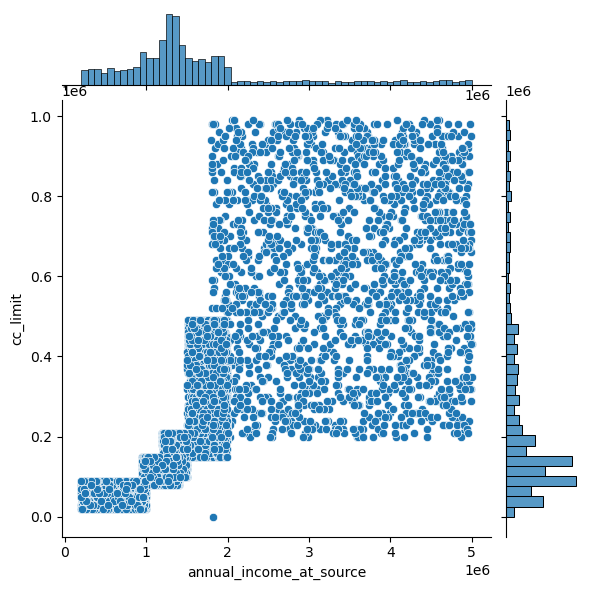

In [739]:
plt.figure(figsize=(15,7))
ax=sns.jointplot(data=df_go, x='annual_income_at_source', y='cc_limit');

In [740]:
df_go[['annual_income_at_source', 'cc_limit']].corr()

,annual_income_at_source,cc_limit
annual_income_at_source,1.000000,0.771886
cc_limit,0.771886,1.000000


In [741]:
df_go[['annual_income_at_source', 'cc_limit']].describe().T

,count,mean,std,min,25%,50%,75%,max
annual_income_at_source,8448.0,1.674595e+06,1.064307e+06,200095.0,1061104.0,1372133.5,1881734.25,4999508.0
cc_limit,8448.0,2.517069e+05,2.291149e+05,0.0,90000.0,150000.0,350000.00,990000.0


## Insights:
- The above graph indicates the annual income and credit card limit are positively correlated (0.77).
- Credit card limit increases as the annual income increases.
- 75% of the customers have annual salary below 1881734.25.
- About 75% of the customers have credit limit below 350000.
- The above graph indicated that there are customers who have high income but less credit limit. Business can take a decision on increasing the limit based on the high income and spending behaviour.

## iii) Annual income at source and Other bank cc holding:

In [742]:
df_go.groupby('other_bank_cc_holding') ['annual_income_at_source'].describe()

,count,mean,std,min,25%,50%,75%,max
other_bank_cc_holding,,,,,,,,
N,3720.0,1.688695e+06,1.054705e+06,200829.0,1083480.00,1381542.5,1901131.5,4999508.0
Y,4728.0,1.663500e+06,1.071782e+06,200095.0,1043919.75,1366372.5,1858852.0,4998847.0


## Insights:
- The above graph shows that customers with no other bank cc holding has mean income greater than the customers who have cc holding on other banks.
- As per the data, customers who have other bank credit card holding are more than customers who do not have.
- There is no major difference between the price range.

## 2.b) Average spends l3m

## i) Average spends l3m and cc limit:

<Figure size 1500x700 with 0 Axes>

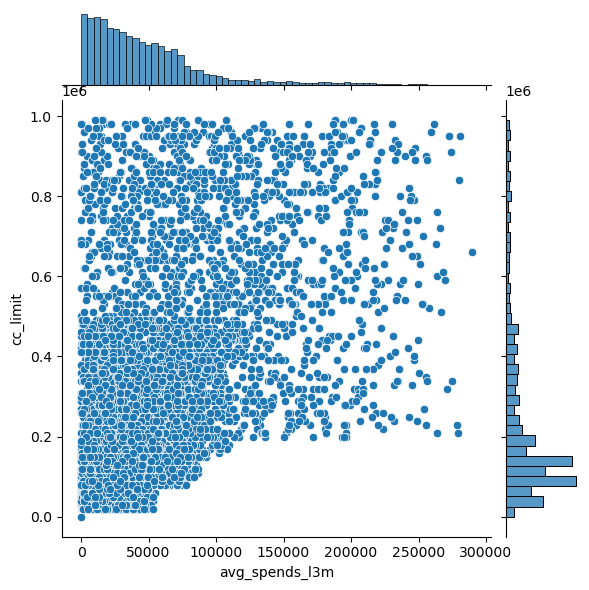

In [743]:
plt.figure(figsize=(15,7))
ax=sns.jointplot(data=df_go, x='avg_spends_l3m', y='cc_limit');

In [744]:
df_go[['avg_spends_l3m', 'cc_limit']].corr()

,avg_spends_l3m,cc_limit
avg_spends_l3m,1.00000,0.52727
cc_limit,0.52727,1.00000


In [745]:
df_go[['avg_spends_l3m', 'cc_limit']].describe().T

,count,mean,std,min,25%,50%,75%,max
avg_spends_l3m,8448.0,49527.365530,46244.954836,0.0,17110.0,37943.0,66095.75,289292.0
cc_limit,8448.0,251706.912879,229114.856385,0.0,90000.0,150000.0,350000.00,990000.0


## Insights:
- Above graph indicates that, average spending of l3m and cc limit are positively correlated (0.52).
- 75% data of average spends fall under 66095.75. 
- 75% of customers have a credit limit of 350000.
- Average spends l3m has the maximum value of 289292 and max credit value is 990000.

## ii) Average spends l3m and bank vintage:

In [746]:
df_go[['avg_spends_l3m', 'bank_vintage']].corr()

,avg_spends_l3m,bank_vintage
avg_spends_l3m,1.000000,-0.003759
bank_vintage,-0.003759,1.000000


In [747]:
df_go[['avg_spends_l3m', 'bank_vintage']].describe().T

,count,mean,std,min,25%,50%,75%,max
avg_spends_l3m,8448.0,49527.365530,46244.954836,0.0,17110.0,37943.0,66095.75,289292.0
bank_vintage,8448.0,33.164181,15.868344,6.0,19.0,33.0,47.00,60.0


<Figure size 1500x700 with 0 Axes>

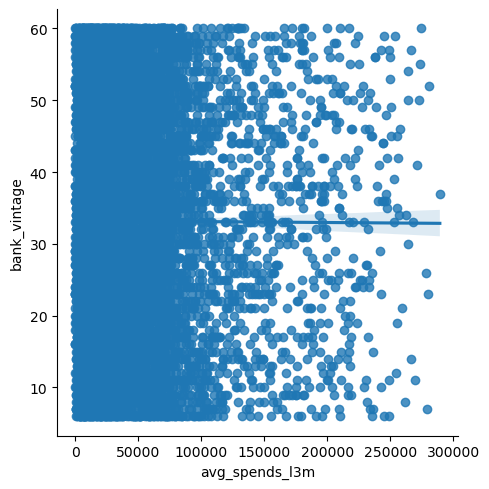

In [748]:
plt.figure(figsize=(15,7))
ax=sns.lmplot(data=df_go, x='avg_spends_l3m', y='bank_vintage');

## Insights:
- Average credit card spends for l3m ranges from 0 to 289292.
- Bank vintage ranges from 6 to 60 months.
- 75% data of average credit card spends for l3m fall under 66095.75.
- 75% data of business vintage fall under 47. 
- The graph indicated that, average credit card spends for l3m and bank vintage is negatively correlated. 

## iii) Average spends l3m and Other bank cc holding:

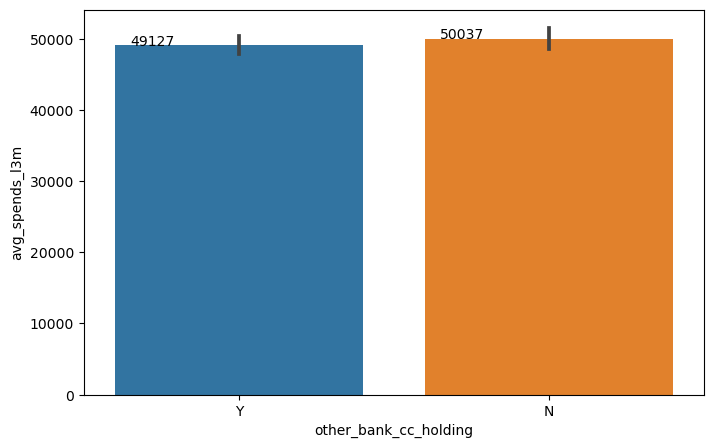

In [749]:
plt.figure(figsize=(8,5))
ax=sns.barplot(data=df_go, x="other_bank_cc_holding", y='avg_spends_l3m') 
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01));

In [750]:
df_go.groupby('other_bank_cc_holding') ['avg_spends_l3m'].describe()

,count,mean,std,min,25%,50%,75%,max
other_bank_cc_holding,,,,,,,,
N,3720.0,50036.536828,46361.142824,0.0,17711.25,38157.5,66528.50,289292.0
Y,4728.0,49126.748519,46154.289445,0.0,16627.00,37750.0,65511.75,280854.0


## Insights:
- Average price of customers who do not have cc on another bank is 50036.54.
- Average price of customers who have cc on another bank is 49216.75.
- Customers with no cc holding on another bank have mean price higher than that of customers having cc on another bank.
- Price range is from 0 to 289292 for customers with no cc holding on another bank and for customers with cc holding on another bank price ranges from 0 to 280854.
- There is a slight difference on the spending behaviour between the customers with or without cc holding on another bank.

## 2.c) CC Limit

## i) cc limit, Issuer and High networth:

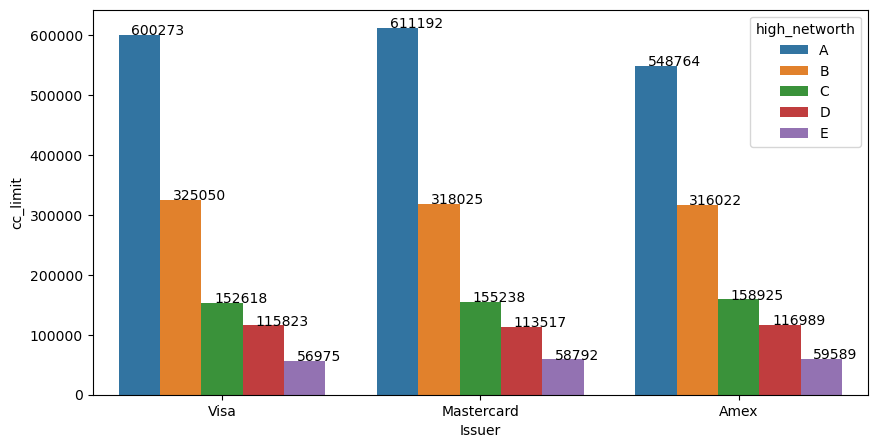

In [751]:
plt.figure(figsize=(10,5))
ax=sns.barplot(data=df_go, x='Issuer', y='cc_limit', hue='high_networth', ci=None, hue_order=['A', 'B', 'C', 'D', 'E']) 
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01));

## Insights:
- Average cc limit of A category customers for Visa is 600273, for Mastercard 611192 and for Amex 548764. In the given data, Mastercard have the higher average credit limit and Amex have the lower credit limit for A category customers.
- For B category, Visa have the higher cc limit when compared with Mastercard and Amex.
- For C, D and E category, Amex have the higher cc limit when compared with Mastercard and Visa. We can say that Amex provides a higher cc limit for C, D and E category customers.

## ii) cc limit and card type:

In [752]:
label=df_go.groupby('card_type') ['cc_limit'].mean().sort_values(ascending=False).index
label

Index(['pulse', 'edge', 'chartered', 'prosperity', 'elite', 'prime',
       'platinum', 'centurion', 'gold', 'rewards', 'indianoil', 'shoprite',
       'smartearn', 'aura', 'cashback'],
      dtype='object', name='card_type')

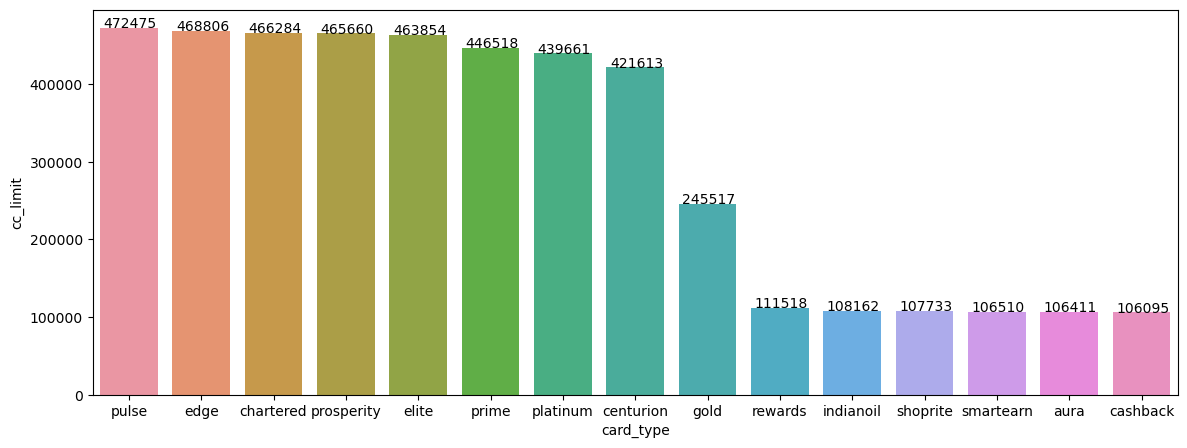

In [753]:
plt.figure(figsize=(14,5))
ax=sns.barplot(data=df_go, x='card_type', y='cc_limit', order=label, ci=None) 
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01));

## Insights:
- Based on the given data, pulse has the highest cc limit with average credit limit of 472475.
- Cashback card type has the lowest credit limit of all, with mean cc limit of 106095.
- Pulse, Edge, Chartered, Prosperity and Elite credit card types are the top 5 cards with higher credit limits.
- Rewards, Indianoil, Shoprite, Smartearn, Aura and Cashback are the cards with lower credet limits.

## iii) cc limit, cc_active30 and Transactor_Revolver:

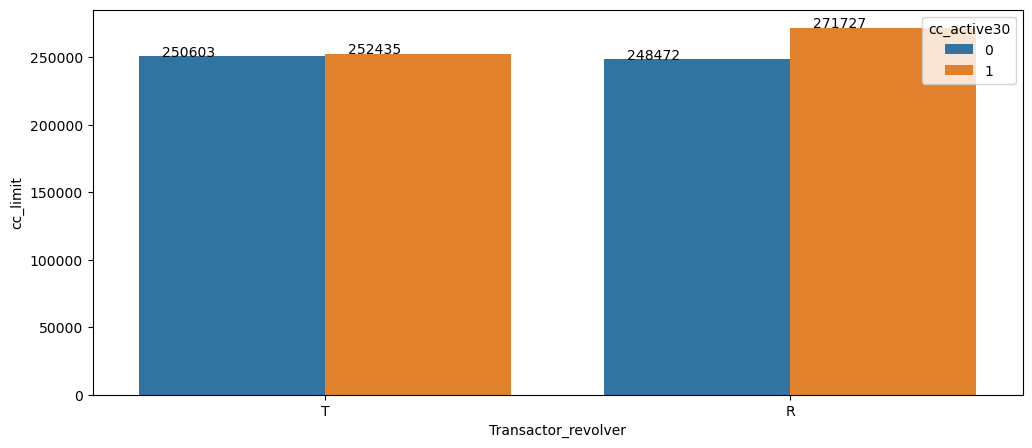

In [754]:
plt.figure(figsize=(12,5))
ax=sns.barplot(data=df_go, x='Transactor_revolver', y='cc_limit', hue='cc_active30', ci=None) 
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01));

## Insights:
- Based on the graph above, customers whose credit card is active and is a Transactor have a mean cc limit of 252435.
- Customers whose credit card is active and is a Revolver have a mean cc limit of 271727.
- Customers whose credit card is inactive and is a Transactor have a mean cc limit of 250603.
- Customers whose credit card is inactive and is a Revolver have a mean cc limit of 248472.
- Business should focus more on retaining back the inactive revolvers, as they generate more profits to the bank.

## 2.d) Other bank cc holding

## i) Other bank cc holding and cc_active 30:

In [755]:
df_go.groupby('other_bank_cc_holding') ['cc_active30'].value_counts()

other_bank_cc_holding  cc_active30
N                      0              2561
                       1              1159
Y                      0              3487
                       1              1241
Name: cc_active30, dtype: int64

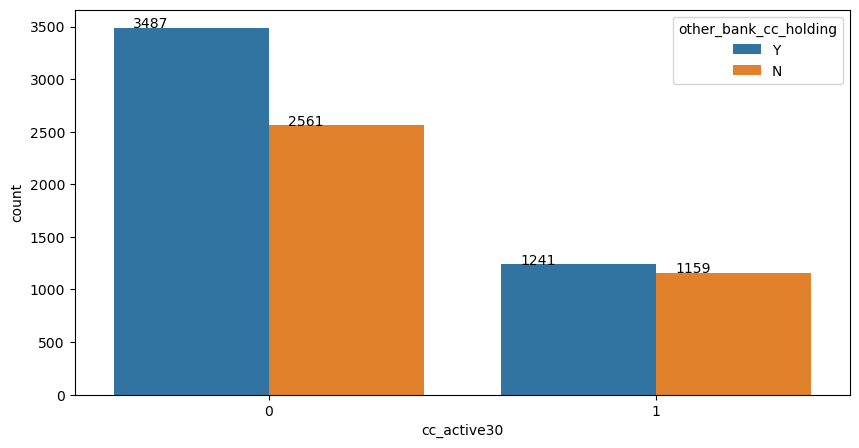

In [756]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_go, x='cc_active30', hue='other_bank_cc_holding', ) 
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01));

## In cc_active30, 1 denotes active and 0 denotes inactive.

## Insights:
- In the given data, highest are the customers with inactive credit card (30 days) and have cc holding on another bank.
- We observe that customers with inactive credit card (30 days) are more when compared with customers with active credit card.
- Of 8448, about 1241 of the customers have cc holding on another bank and have active credit cards.
- Of 8448, about 2561 of the customers do not have both active credit cards and cc holding on another bank.
- 1159 of 8448, are the customers with active credit card and also do not have cc holding on another bank.

## ii) Other bank cc holding and Transactor_Revolver:

In [757]:
TR=pd.crosstab(df_go['other_bank_cc_holding'], df_go['Transactor_revolver'], margins=True, normalize=True)
TR

Transactor_revolver,R,T,All
other_bank_cc_holding,,,
N,0.066761,0.373580,0.440341
Y,0.086529,0.473130,0.559659
All,0.153291,0.846709,1.000000


## Insights:
- Based on the given data, 47.31% of transactors have other bank cc holding.
- 8.65% revolvers have cc holding on another bank.
- 37.36% of transactors do not hold any credit card with other banks.
- 6.68% of revolvers do not hold any credit card with other banks.

In [758]:
TR.drop(['All'], axis=0, inplace=True)
TR.drop(['All'], axis=1, inplace=True)

<Figure size 1400x700 with 0 Axes>

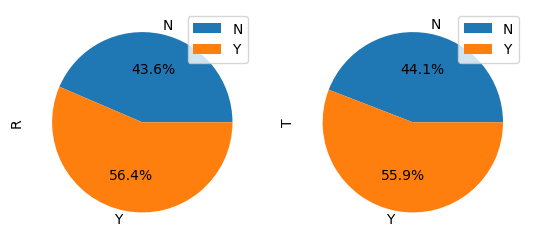

In [759]:
plt.figure(figsize=(14,7))
TR.plot.pie(subplots=True, autopct='%1.1f%%')
plt.show()

## Insights:
- 56.4% of Revolvers have cc holding on another bank and 43.6% of Revolvers do not have cc holding on another bank.
- 55.9% of Transactors have credit card holdings on another bank and 44.1% do not have cc holding on another bank. 

## 2.e) Card type

## i) Card type:

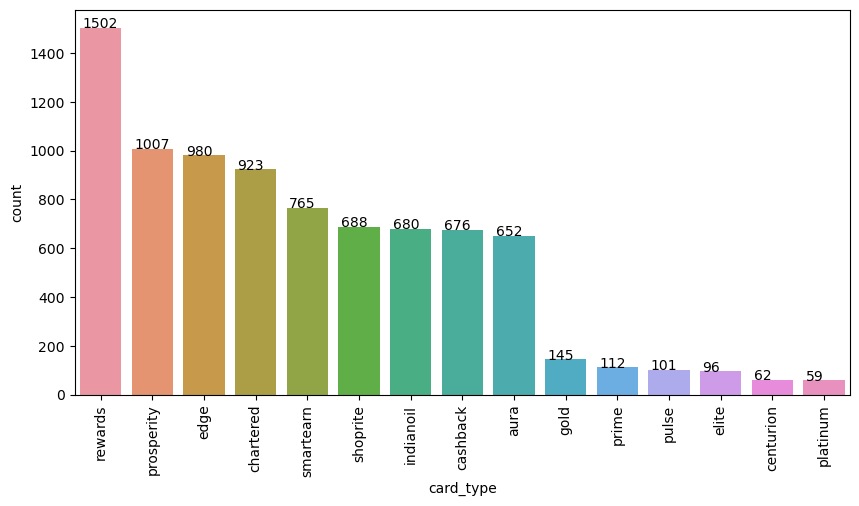

In [760]:
label=df_go.card_type.value_counts().sort_values(ascending=False).index
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_go, x="card_type", order=label) 
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01))
plt.xticks(rotation = 90);

## Insights:
- Based on the data, customers have reward cards the most i.e., 1502 of 8448 customers.
- Customers have platinum card the least.
- Rewards, prosperity, edge, chartered and smartearn are the top 5 card types which most customers have.
- Platinum, centurion, elite, pulse, prime and gold are the card types which customers prefer the least.
- Business has to take a measure to issue right card type to the right customer, only then the customers effectively make use of it.

## ii) Card type and Average spends l3m:

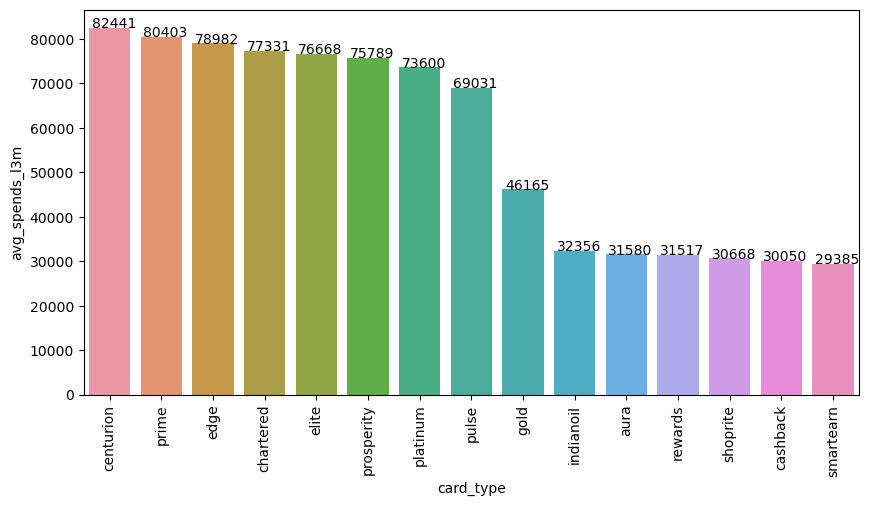

In [761]:
labels=df_go.groupby('card_type') ['avg_spends_l3m'].mean().sort_values(ascending=False).index
plt.figure(figsize=(10,5))
ax=sns.barplot(data=df_go, x="card_type", y='avg_spends_l3m', ci=None, order=labels)
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01))
plt.xticks(rotation = 90);

## Insights:
- Average amount spent by the customers in 3 months using the centurion card type is 82441. It is the highest when compared with the group.
- Average spends in 3 months using prime card is 80403, which is slightly lower than the centurion card.
- Smartearn card type is the least among the group.
- Average amount spent in last 3 months by the customers using smartearn card is 29385, cashback is 30050, shoprite is 30668, rewards is 31517, aura is 31580 and indianoil card is 32356. All these cards may be less preferred by the customers or with lower credit limits.

## iii) Card type and cc active30:

In [762]:
# cc active 30 customers
cc_30=df_go[df_go['cc_active30']==1]
cc_30.head(2)

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
7,8,4375 51XX XXXX XXXX,437551,Visa,edge,2014-12-27,B,0,1,1,...,60,0,0,0,0,0,T,40290,Salaried,260000


In [763]:
order_30=cc_30['card_type'].value_counts().index
order_30

Index(['rewards', 'edge', 'chartered', 'prosperity', 'smartearn', 'indianoil',
       'cashback', 'aura', 'shoprite', 'prime', 'gold', 'pulse', 'elite',
       'centurion', 'platinum'],
      dtype='object')

In [764]:
# cc inactive 30 customers
cc_i30=df_go[df_go['cc_active30']==0]
cc_i30.head(2)

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000


In [765]:
order_i30=cc_i30['card_type'].value_counts().index
order_i30

Index(['rewards', 'prosperity', 'edge', 'chartered', 'smartearn', 'shoprite',
       'cashback', 'indianoil', 'aura', 'gold', 'prime', 'pulse', 'elite',
       'centurion', 'platinum'],
      dtype='object')

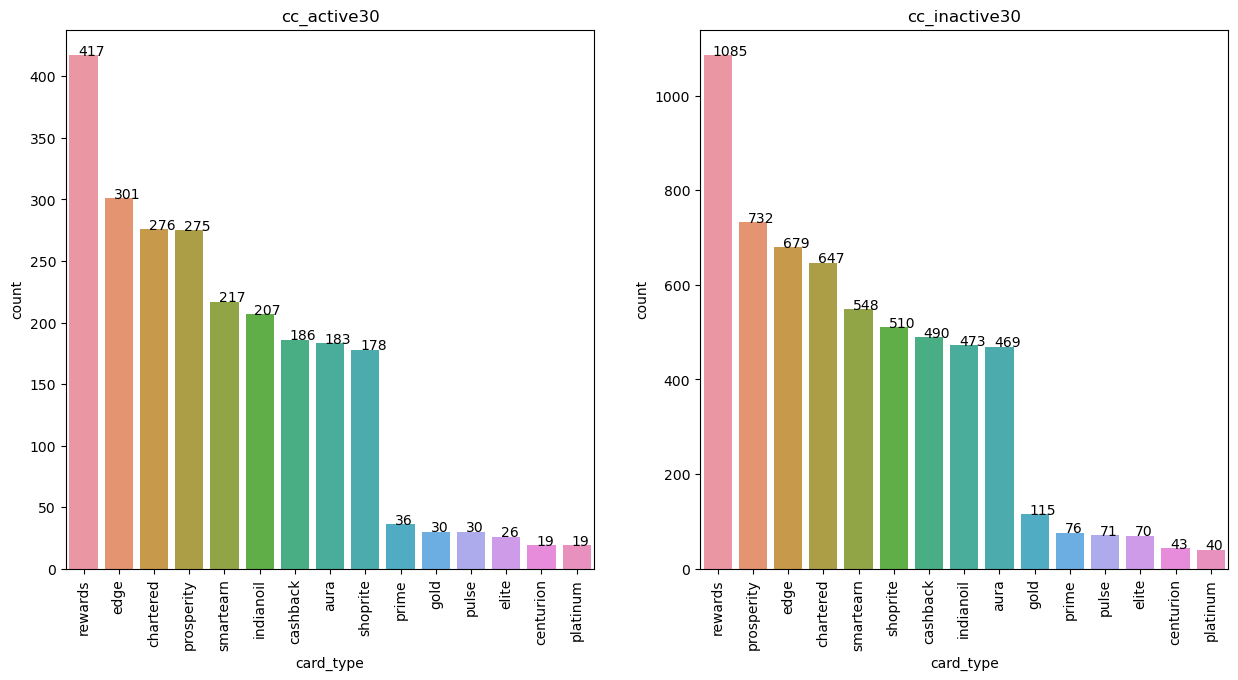

In [766]:
fig, axes =plt.subplots(1,2, figsize=(15, 7))

ax=sns.countplot(data=cc_30, x="card_type", order=order_30, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.title.set_text('cc_active30')

ax=sns.countplot(data=cc_i30, x="card_type", order=order_i30, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.title.set_text('cc_inactive30')

## Insights:
- The above graph on the left-hand side represents the card types which are active in last 30 days, and the graph to the right-hand side represents inactive cards in last 30 days.
- We observe that card, of 1502 reward cards, 417 of them is active and about 1085 of them are inactive.
- Even the least used platinum card has only 19 active customers of 59 in total. About 40 of them are inactive. 
- In the above graph we can note that, only 2400 of credit cards are active in last 30 days, rest 6048 credit cards are inactive.
- Business needs to issue cards on the usage of customers i.e., more benefits should be given to the customers who make effective use of cards. 